In [283]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mlb
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from collections import OrderedDict
import seaborn as sns
import os
import sys
from datetime import datetime, timedelta, date

#sns.set(style="whitegrid", context="talk")
sns.set(style="whitegrid")
sns.set_color_codes("dark")

#GREY = '#ABB2B9'
#GREEN = '#4CAF50'
#BLUE = '#1565C0'
#AMBER = '#FF9800'
#RED = '#D32F2F'

GREY = '#9B9B9B'
GREEN = '#06C454'
BLUE = '#2E50FB'
AMBER = '#FFC300'
RED = '#D32F2F'

PCA_COMPLIANCE = {
    'NON-COMPLIANT':5, 
    'NON-COMPLIANT ':5, 
    'NON-COMPLIANT f':5, 
    'NON-COMPLIANT(F)':5, 
    'PARTIALLY COMPLIANT':4, 
    'PARTIALLY COMPLIANT ':4, 
    'PARTIALLY COMPLIANT f':4,
    'PARTIALLY COMPLIANT(F)':4,
    'COMPLIANT':3,
    'FULLY COMPLIANT':3,
    'FULLY COMPLIANT ':3,
    'FULLY COMPLIANT f':3,
    'TRANSFER':2,
    'RESOLVED':2,
    'N/a':1,
    'N/A':1
}

PCA_COMPLIANCE_INVERSE = {
    5:'NON-COMPLIANT', 
    4:'PARTIALLY COMPLIANT', 
    3:'FULLY COMPLIANT',
    2:'RESOLVED/TRANSFERED',
    1:'N/A'
}


SCA_COMPLIANCE = {
    '0 - n/a':0,
    '1 - Very Inadequate / Major Non-Conformity':1,
    '2 - Inadequate / Minor Non-Conformity (high severity)':2,
    '3 - Partially adequate / Minor Non-Conformity (low severity)':3,
    '4 - Broadly adequate / Observation':4,
    '5 - Substantially adequate / Compliant':5
}

SCA_COMPLIANCE_INVERSE = {
    0:'0 - n/a',
    1:'1 - Very Inadequate / Major Non-Conformity',
    2:'2 - Inadequate / Minor Non-Conformity (high severity)',
    3:'3 - Partially adequate / Minor Non-Conformity (low severity)',
    4:'4 - Broadly adequate / Observation',
    5:'5 - Substantially adequate / Compliant'
}

today = datetime.now().strftime('%d-%m-%Y')
week_num = datetime.today().strftime('%Y Week %W')

week = datetime.today().strftime('%W')

default_date_v = date(2018,10,31)
default_date_h = date(2018,5,18)

print default_date_v.strftime('%d/%m/%Y')

31/10/2018


# Reporting Notes
- We need to show a heatmap of the current snapshot
- Heatmap needed for PCA DPIA view i.e 1 , 2 .. 80
- Heatmap needed for PCA Cookbook view i.e. 1H, 2H, 7V .. 80V
- Heatmap per practice for the above heatmaps
- Project code heatmap
- Project reject heatmap

In [284]:
ls

All_REMEDIATION_STATS.xlsx
Archive Output/
Archive Responses/
Baseline-Per-Practice-Heatmap30-04-2018.png
burndown first baseline.xlsx
burndown.xlsx
compliancy_heatmap_28-04-2018.png
compliancy_heatmap_29-04-2018.png
compliancy_heatmap_30-04-2018.png
Compliancy-Heatmap.ipynb
Convert-RS-2.2.ipynb
Convert-RS-3.0.ipynb
Convert-RS-4.ipynb
dump.xlsx
Error Files/
GDPR-SNAPSHOT-28-04-2018.xlsx
GDPR-SNAPSHOT-30-04-2018.xlsx
heatmap_baseline/
HV-Breakdown-Compliancy-Heatmap30-04-2018.png
HV-Breakdown-Per-Practice-Heatmap30-04-2018.png
old_output_rs/
old RS versions/
output_rs/
output_rs (copy)/
PCA-ComliancyCount-30-04-2018.png
PCA-Compliancy-Heatmap30-04-2018.png
PCA_HEATMAP.xlsx
PCA-ProjectCodeStatus-30-04-2018.png
PCA-Responses-30-04-2018.png
Per-Practice-Heatmap30-04-2018.png
README.md
REMEDIATION_STATS.xlsx
Reports/
RS_FEEDBACK/
RS_responses/
RS_responses (copy)/
Transfer-RS-Responses.ipynb
Transfer-RS-Responses-V2.ipynb


In [285]:
pwd

u'/home/andy/dev/notebooks/Transfer-RS-Feedback'

In [286]:
dateparse = lambda x: pd.datetime.strptime(x, '%d-%m-%Y')

#df = pd.read_csv(infile, parse_dates=['datetime'], date_parser=dateparse)#pca_df = pd.read_excel('./RS_FEEDBACK/All/All-REMEDIATION-STATS-27-04-2018.xlsx', na_values=[""], keep_default_na=False)
#sca_df = pd.read_excel('./RS_FEEDBACK/All/All-REMEDIATION-STATS-27-04-2018.xlsx', na_values=[""], keep_default_na=False)
pca_df = pd.read_excel('./RS_FEEDBACK/All/All-REMEDIATION-STATS-Week18-03-05-2018.xlsx', na_values=[""], keep_default_na=False)
sca_df = pd.read_excel('./RS_FEEDBACK/All/All-REMEDIATION-STATS-Week18-03-05-2018.xlsx', na_values=[""], keep_default_na=False)



In [287]:
#new_df = pd.to_datetime(pca_df[pca_df['Product ID']==176]['Delivery Date'], format='%dth %B %Y')
#index_loc = pca_df[pca_df['Product ID']==176].index
#pca_df.loc[index_loc,'DELIVERY_DATE'] = new_df

pca_df['Delivery Date'].replace('None', np.nan, inplace=True)

In [288]:
#pca_df[pca_df['Product ID']==68][['Delivery Date','Req nr']]

In [289]:
#pca_df['Req nr'][8][-1:]

def return_default_date( x ):
    if x[-1:] == 'H':
        return default_date_h
    elif x[-1:] == 'V':
        return default_date_v
    else:
        return default_date_v


In [290]:
HFilter = pca_df['Req nr'].str.contains('H')
VFilter = pca_df['Req nr'].str.contains('V')

#Hindex_loc = pca_df[HFilter].index


In [291]:
index = pca_df[HFilter].index

pca_df.loc[index, 'Delivery Date'].fillna(default_date_h, inplace=True)
#pca_df.loc[index, 'Delivery Date']

In [292]:
#HFilter = pca_df['Req nr'].str.contains('H')
#VFilter = pca_df['Req nr'].str.contains('V')

#Hindex_loc = pca_df[HFilter].index

#pca_df.loc[Hindex_loc, 'Delivery Date'].fillna(default_date_h, inplace=True)
#pca_df.loc[Hindex_loc].replace(to_replace='tbc', value='TBC', inplace=True)
#pca_df.loc[Hindex_loc].replace(to_replace='GE-PCA-75H', value=default_date_h, inplace=True)
#pca_df.loc[Hindex_loc,'Delivery Date'].replace(to_replace={'Delivery Date':{None:default_date_h}}, inplace=True)


#Vindex_loc = pca_df[VFilter].index

#pca_df.loc[Vindex_loc, 'Delivery Date'].fillna(default_date_v, inplace=True)

#pca_df['Delivery Date'].replace(to_replace='11th May 2018', value=date(2018,5,11), inplace=True)
#pca_df['Delivery Date'].replace(to_replace='30th April 2018', value=date(2018,4,30), inplace=True)
#pca_df['Delivery Date'].replace(to_replace='25/05/18', value=date(2018,5,25), inplace=True)
#pca_df['Delivery Date'].replace(to_replace='25/09/18', value=date(2018,9,25), inplace=True)
#pca_df['Delivery Date'].replace(to_replace='30/10/18', value=date(2018,10,30), inplace=True)
#pca_df['Delivery Date'].replace(to_replace='GE-PCA-75H', value=default_date_h, inplace=True)
#pca_df.loc[Vindex_loc,'Delivery Date'] = pca_df.loc[Vindex_loc].replace(to_replace={'Delivery Date':{None:default_date_v}}, inplace=True, regex=False)
#pca_df.loc[Vindex_loc,'Delivery Date'] = pca_df.loc[Vindex_loc,'Delivery Date'].replace(to_replace='TBC', value=default_date_v, inplace=True)


In [293]:
pca_df[pca_df['Product ID']==176][['Delivery Date','Req nr']].iloc[8]

Delivery Date    2018-05-11 00:00:00
Req nr                           70V
Name: 8, dtype: object

In [294]:
pca_df['Delivery Date'].value_counts(dropna=False).sum()

7675

In [295]:
OUTPUT_BASE_DIR = './Reports/'+week_num
#OUTPUT_BASE_DIR = './Reports/Test'

if not os.path.exists(OUTPUT_BASE_DIR):
    os.mkdir(OUTPUT_BASE_DIR)

In [296]:
ll Reports/Baseline

total 1544
-rw-rw-r-- 1 andy  61764 May  3 11:24 Baseline-Per-Practice-Heatmap-03-05-2018.png
-rw-rw-r-- 1 andy 513325 May  3 11:21 GDPR-SNAPSHOT-Baseline (old).xlsx
-rw-rw-r-- 1 andy 584334 May  3 22:47 GDPR-SNAPSHOT-Baseline.xlsx
-rw-rw-r-- 1 andy  68733 May  3 11:27 HV-Breakdown-Compliancy-Heatmap-03-05-2018.png
-rw-rw-r-- 1 andy  76043 May  3 11:27 HV-Breakdown-Per-Practice-Heatmap-03-05-2018.png
-rw-rw-r-- 1 andy  18866 May  3 11:27 PCA-Burndown-03-05-2018.png
-rw-rw-r-- 1 andy  23491 May  3 11:27 PCA-Burndown-Per-Practice-03-05-2018.png
-rw-rw-r-- 1 andy  56310 May  3 11:27 PCA-Compliancy-Heatmap-03-05-2018.png
-rw-rw-r-- 1 andy  61764 May  3 11:27 PCA-Per-Practice-Heatmap-03-05-2018.png
-rw-rw-r-- 1 andy  28710 May  3 11:27 PCA-ProjectCodeStatus-03-05-2018.png
-rw-rw-r-- 1 andy  33279 May  3 11:27 PCA-Responses-03-05-2018.png
-rw-rw-r-- 1 andy  25210 May  3 10:45 PCA-RiskCategory-03-05-2018.png


In [297]:
#Note: going forward, read in the baseline from the previous snapshot.

#pca_baseline = pd.read_excel('./heatmap_baseline/EPS_PCA_Heatmap_27 Apr18_v3.xlsx')
pca_baseline = pd.read_excel('./Reports/Baseline/GDPR-SNAPSHOT-Baseline.xlsx', sheet_name='PCA Rollup Baseline')
sca_baseline = pd.read_excel('./Reports/Baseline/GDPR-SNAPSHOT-Baseline.xlsx', sheet_name='SCA Baseline')
pca_baseline.head()

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
1,FULLY COMPLIANT,PARTIALLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,...,NON-COMPLIANT,TRANSFER,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,NON-COMPLIANT,NON-COMPLIANT,TRANSFER,TRANSFER,TRANSFER,NON-COMPLIANT
2,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,FULLY COMPLIANT,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,...,NON-COMPLIANT,TRANSFER,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,NON-COMPLIANT,PARTIALLY COMPLIANT,TRANSFER,TRANSFER,TRANSFER,FULLY COMPLIANT
3,PARTIALLY COMPLIANT,RESOLVED,FULLY COMPLIANT,RESOLVED,RESOLVED,FULLY COMPLIANT,RESOLVED,PARTIALLY COMPLIANT,RESOLVED,FULLY COMPLIANT,...,RESOLVED,NaN,FULLY COMPLIANT,FULLY COMPLIANT,NaN,RESOLVED,NaN,NaN,NaN,NaN
4,RESOLVED,FULLY COMPLIANT,NON-COMPLIANT,NON-COMPLIANT,NON-COMPLIANT,NON-COMPLIANT,NON-COMPLIANT,NON-COMPLIANT,NON-COMPLIANT,NON-COMPLIANT,...,FULLY COMPLIANT,TRANSFER,FULLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,TRANSFER,TRANSFER,TRANSFER,NON-COMPLIANT
5,FULLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,PARTIALLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,PARTIALLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,...,FULLY COMPLIANT,TRANSFER,FULLY COMPLIANT,FULLY COMPLIANT,PARTIALLY COMPLIANT,FULLY COMPLIANT,TRANSFER,TRANSFER,FULLY COMPLIANT,FULLY COMPLIANT


In [298]:
pca_df.head()

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA
0,NON-COMPLIANT,2018-04-30,1.0,GDPR-RS-EPS176-IoT-Analytics-V4.0 REVIEWED-(02...,176,PRJ03563,EPS176-PCA-2H-A,2H,Remediation in progress,Governance Framework and application of Privac...,EPS176-PCA-2H,PCA,Project Code Allocated,Cloud,A,NaN,NaN,NaN
1,NON-COMPLIANT,2018-05-11,1.0,GDPR-RS-EPS176-IoT-Analytics-V4.0 REVIEWED-(02...,176,PRJ03563,EPS176-PCA-4H-A,4H,Remediation in progress,"Process Module resolution, apply step to Aris,...",EPS176-PCA-4H,PCA,Project Code Allocated,Cloud,B,NaN,NaN,NaN
2,NON-COMPLIANT,2018-05-11,1.0,GDPR-RS-EPS176-IoT-Analytics-V4.0 REVIEWED-(02...,176,PRJ03563,EPS176-PCA-52H-A,52H,Remediation in progress,"Process Module resolution, apply step to Aris,...",EPS176-PCA-52H,PCA,Project Code Allocated,Cloud,F,NaN,NaN,NaN
3,NON-COMPLIANT,2018-05-11,1.0,GDPR-RS-EPS176-IoT-Analytics-V4.0 REVIEWED-(02...,176,PRJ03563,EPS176-PCA-52V-A,52V,Remediation in progress,"Process Module resolution, apply step to Aris,...",EPS176-PCA-52V,PCA,Project Code Allocated,Cloud,F,NaN,NaN,NaN
4,NON-COMPLIANT,2018-05-11,1.0,GDPR-RS-EPS176-IoT-Analytics-V4.0 REVIEWED-(02...,176,PRJ03563,EPS176-PCA-58H-A,58H,Remediation in progress,"Process Module resolution, apply step to Aris,...",EPS176-PCA-58H,PCA,Project Code Allocated,Cloud,F,NaN,NaN,NaN


In [299]:
compliancy_stats = pca_baseline.apply(pd.Series.value_counts)

In [300]:
compliancy_stats.fillna(0,inplace=True)
compliancy_stats.columns.name = 'Product ID'
compliancy_stats

Product ID,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
FULLY COMPLIANT,21.0,13.0,18.0,13.0,8.0,8.0,24.0,30.0,14.0,18.0,...,26.0,2.0,13.0,10.0,10.0,19.0,5.0,6.0,4.0,8.0
NON-COMPLIANT,4.0,6.0,3.0,2.0,7.0,1.0,2.0,10.0,8.0,7.0,...,6.0,0.0,2.0,3.0,10.0,6.0,0.0,0.0,0.0,2.0
NON-COMPLIANT(F),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0
PARTIALLY COMPLIANT,24.0,17.0,18.0,11.0,23.0,12.0,17.0,8.0,19.0,17.0,...,13.0,0.0,9.0,10.0,14.0,6.0,0.0,0.0,0.0,6.0
PARTIALLY COMPLIANT(F),5.0,2.0,0.0,0.0,2.0,4.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,4.0,0.0,0.0,0.0,2.0
RESOLVED,5.0,6.0,5.0,2.0,17.0,3.0,17.0,0.0,11.0,0.0,...,7.0,0.0,3.0,2.0,5.0,3.0,0.0,0.0,0.0,0.0
TRANSFER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,61.0,0.0,0.0,0.0,0.0,62.0,59.0,64.0,0.0


In [301]:
#fig, ax = plt.subplots(figsize=(25,10))

#sns.barplot(x=67, data=compiancy_stats,
#            label="Total", color="b")

#sns.barplot(data=compliancy_stats.loc['FULLY COMPLIANT'],  ax=ax, saturation=1, palette='Set3')
#sns.barplot(data=compliancy_stats, x='PARTIALLY COMPLIANT',  saturation=1, palette='Set3')
#ax = sns.factorplot(data=pca_baseline, ax=ax, x=68, saturation=1, palette='Set3')
#ax = sns.factorplot(data=compiancy_stats.T, ax=ax, x='TRANSFER',saturation=1, palette='Set3')
#ax.set_ylabel("Count")
#ax.set_title("Chart to show all PCA compliancy counts per product: "+today, size=20)
#fig.savefig("./PCA-ComliancyCount-"+today+".png")

In [302]:
#compiancy_stats.loc['FULLY COMPLIANT']

In [303]:
pca_rollup_target = pca_baseline.copy()

In [304]:
pca_rollup_target.fillna('N/A', inplace=True)

for key in PCA_COMPLIANCE.keys():
    pca_rollup_target.replace(key, value=PCA_COMPLIANCE.get(key), inplace=True)


In [305]:
pca_rollup_target

Product ID,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
1,3,4,3,3,3,3,3,3,3,3,...,5,2,4,4,5,5,2,2,2,5
2,4,4,4,4,4,4,3,4,4,4,...,5,2,4,4,5,4,2,2,2,3
3,4,2,3,2,2,3,2,4,2,3,...,2,1,3,3,1,2,1,1,1,1
4,2,3,5,5,5,5,5,5,5,5,...,3,2,3,3,3,3,2,2,2,5
5,3,3,3,4,3,3,4,3,3,3,...,3,2,3,3,4,3,2,2,3,3
6,3,3,3,4,4,2,3,3,4,4,...,3,3,3,3,3,3,3,3,2,3
7,3,3,3,4,4,3,3,3,1,4,...,3,2,1,1,1,1,2,2,2,1
8,2,1,1,1,1,1,2,1,2,1,...,1,2,1,1,1,1,1,2,2,1
9,3,1,1,4,2,1,3,4,1,3,...,4,2,1,1,1,4,3,2,1,1
10,1,1,3,3,2,2,3,4,2,1,...,3,2,1,4,3,3,3,2,2,4


In [306]:


PRACTICE = 'ALL'

iot_set = set([67,68,89,90,91,94,97,101,102,103,109,110])
cloud_set = set([43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116])
connectivity_set = set([10,12,21,22,24,27,28,29,31,33,42,66,72,80,81,118,121,156,158])
eit_set = set([126,136,141,128,130,129,198,127,1])
uc_set = set([2,4,5,7,8,9,14,70,71,87,123,193,194,195,147])

iot_cols = [67,68,89,90,91,94,97,101,102,103,109,110]
cloud_cols = [43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116]
connectivity_cols = [10,12,21,22,27,28,29,31,33,42,66,72,80,81,118,121,156,158]
eit_cols = [126,136,141,128,130,129,198,127,1]
uc_cols = [2,4,5,7,8,9,14,70,71,87,123,193,194,195,147]

In [307]:
def return_practice( prod_id ):
    if prod_id in iot_set:
        return 'IoT'
    elif prod_id in cloud_set:
        return 'Cloud'
    elif prod_id in connectivity_set:
        return 'Connectivity'
    elif prod_id in eit_set:
        return 'EIT'
    elif prod_id in uc_set:
        return 'UC'
    else:
        return 'Unknown Practice'

pca_df['Practice'] = pca_df['Product ID'].map(lambda x: return_practice(x))
sca_df['Practice'] = sca_df['Product ID'].map(lambda x: return_practice(x))


In [308]:
pca_df = pca_df[pca_df['Category'] == 'PCA']
sca_df = sca_df[sca_df['Category'] == 'SCA']
sca_df

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA
63,4 - Broadly adequate / Observation,NaT,1.0,GDPR-RS-EPS054-Hosting Solution Management-V4....,54,No Response,EPS054-SCA-12.4.3-A,12.4.3,No Response,NaN,EPS054-SCA-12.4.3,SCA,No Project Code,Cloud,UNKNOWN,NaN,NaN,NaN
64,3 - Partially adequate / Minor Non-Conformity ...,NaT,1.0,GDPR-RS-EPS054-Hosting Solution Management-V4....,54,No Response,EPS054-SCA-14.1.2-A,14.1.2,No Response,NaN,EPS054-SCA-14.1.2,SCA,No Project Code,Cloud,UNKNOWN,NaN,NaN,NaN
65,2 - Inadequate / Minor Non-Conformity (high se...,NaT,1.0,GDPR-RS-EPS054-Hosting Solution Management-V4....,54,No Response,EPS054-SCA-18.1.4-A,18.1.4,No Response,NaN,EPS054-SCA-18.1.4,SCA,No Project Code,Cloud,UNKNOWN,NaN,NaN,NaN
66,4 - Broadly adequate / Observation,NaT,1.0,GDPR-RS-EPS054-Hosting Solution Management-V4....,54,No Response,EPS054-SCA-9.2.1-A-A,9.2.1-A,No Response,NaN,EPS054-SCA-9.2.1-A,SCA,No Project Code,Cloud,UNKNOWN,NaN,NaN,NaN
67,4 - Broadly adequate / Observation,NaT,1.0,GDPR-RS-EPS054-Hosting Solution Management-V4....,54,No Response,EPS054-SCA-9.2.6-A-A,9.2.6-A,No Response,NaN,EPS054-SCA-9.2.6-A,SCA,No Project Code,Cloud,UNKNOWN,NaN,NaN,NaN
81,3 - Partially adequate / Minor Non-Conformity ...,NaT,1.0,GDPR-RS-EPS024-Device Lifecycle Management-V4....,24,No Response,EPS024-SCA-12.4.1-A,12.4.1,No Response,NaN,EPS024-SCA-12.4.1,SCA,No Project Code,Connectivity,UNKNOWN,NaN,NaN,NaN
82,4 - Broadly adequate / Observation,NaT,1.0,GDPR-RS-EPS024-Device Lifecycle Management-V4....,24,No Response,EPS024-SCA-9.2.1-A-A,9.2.1-A,No Response,NaN,EPS024-SCA-9.2.1-A,SCA,No Project Code,Connectivity,UNKNOWN,NaN,NaN,NaN
83,4 - Broadly adequate / Observation,NaT,1.0,GDPR-RS-EPS024-Device Lifecycle Management-V4....,24,No Response,EPS024-SCA-9.2.2-A,9.2.2,No Response,NaN,EPS024-SCA-9.2.2,SCA,No Project Code,Connectivity,UNKNOWN,NaN,NaN,NaN
84,4 - Broadly adequate / Observation,NaT,1.0,GDPR-RS-EPS024-Device Lifecycle Management-V4....,24,No Response,EPS024-SCA-9.4.1-A,9.4.1,No Response,NaN,EPS024-SCA-9.4.1,SCA,No Project Code,Connectivity,UNKNOWN,NaN,NaN,NaN
85,4 - Broadly adequate / Observation,NaT,1.0,GDPR-RS-EPS024-Device Lifecycle Management-V4....,24,No Response,EPS024-SCA-9.4.2-A,9.4.2,No Response,NaN,EPS024-SCA-9.4.2,SCA,No Project Code,Connectivity,UNKNOWN,NaN,NaN,NaN


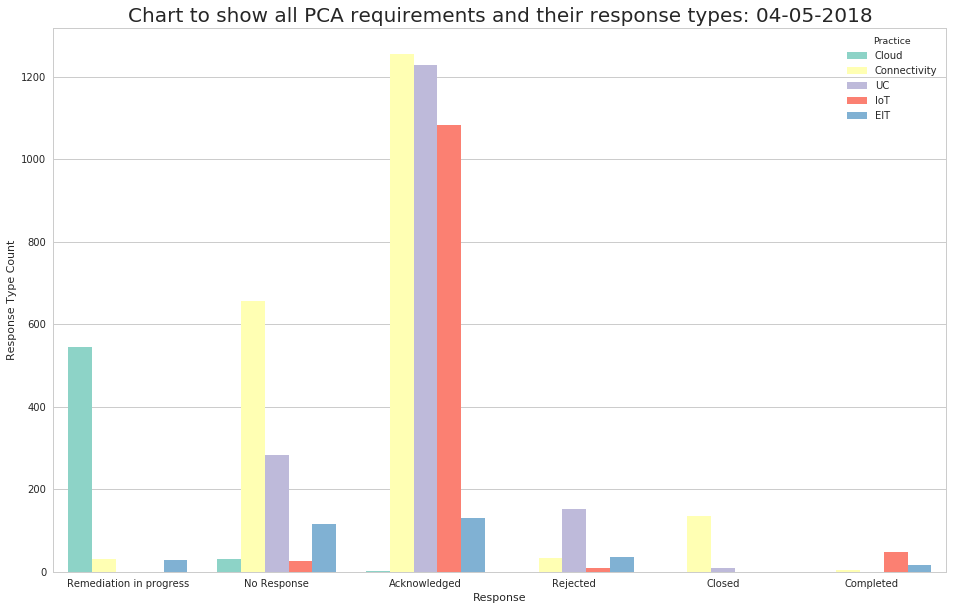

In [309]:
fig, ax = plt.subplots(figsize=(16,10))

ax = sns.countplot(data=pca_df, ax=ax, x='Response', hue='Practice', saturation=1, palette='Set3')
ax.set_ylabel("Response Type Count")
ax.set_title("Chart to show all PCA requirements and their response types: "+today, size=20)
fig.savefig(OUTPUT_BASE_DIR+"/PCA-Responses-"+today+".png")

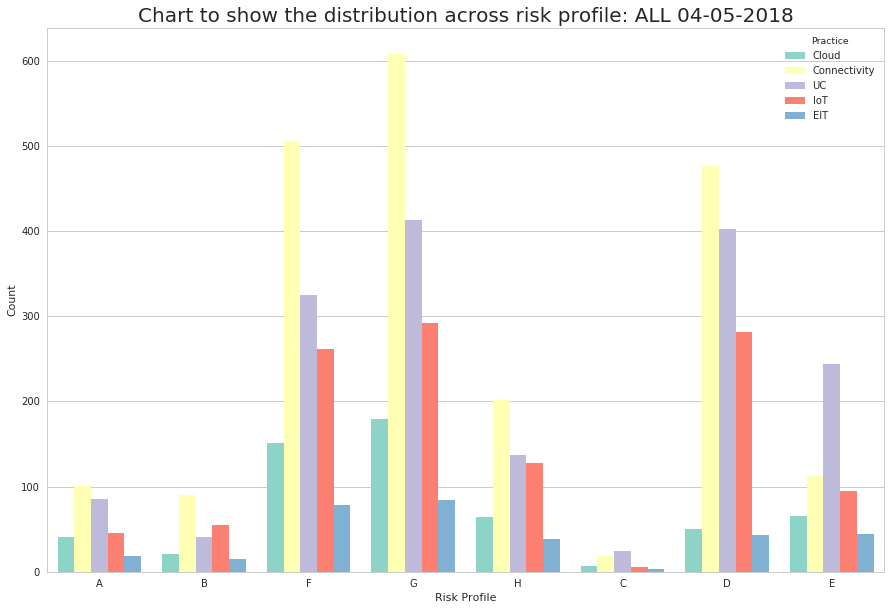

In [310]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.countplot(data=pca_df, ax=ax, x='Risk Category', hue='Practice',saturation=1, palette='Set3')
ax.set_ylabel("Count")
ax.set_xlabel("Risk Profile")
ax.set_title("Chart to show the distribution across risk profile: "+PRACTICE+" "+today, size=20)

fig.savefig(OUTPUT_BASE_DIR+"/PCA-Risk-Profile-Distribution-"+today+".png")

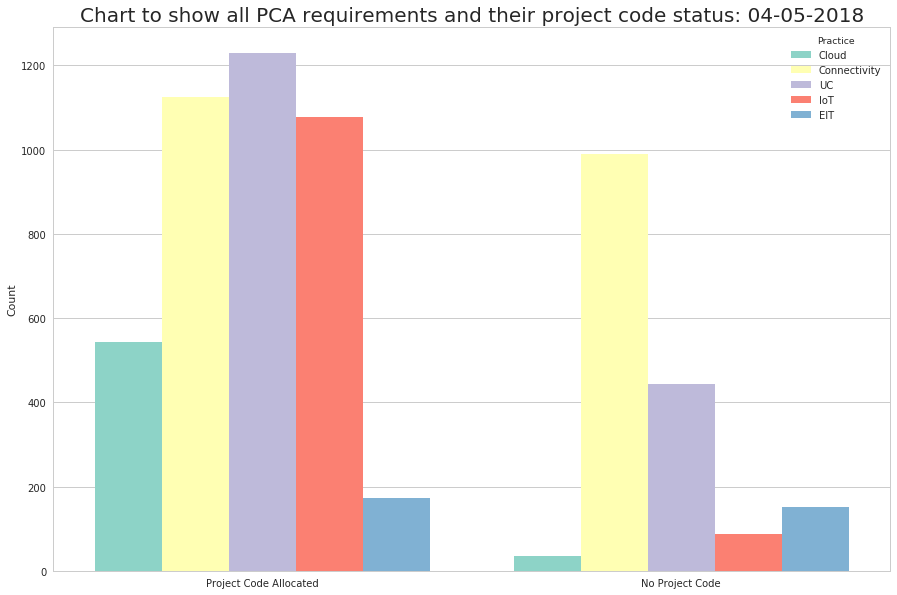

In [311]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.countplot(data=pca_df, ax=ax, x='Orphan', hue='Practice', saturation=1, palette='Set3')
ax.set_ylabel("Count")
ax.set_xlabel("")
ax.set_title("Chart to show all PCA requirements and their project code status: "+today, size=20)
fig.savefig(OUTPUT_BASE_DIR+"/PCA-ProjectCodeStatus-"+today+".png")

In [312]:
#fig, ax = plt.subplots(figsize=(15,10))

#ax = sns.countplot(data=pca_df, ax=ax, x='Risk Category', hue='Practice', saturation=1, palette='Set3')
#ax.set_ylabel("Count")
#ax.set_xlabel("")
#ax.set_title("Chart to show all PCA requirements and their and their risk category: "+today, size=20)
#fig.savefig(OUTPUT_BASE_DIR+"/PCA-RiskCategory-"+today+".png")

In [313]:
COLS = [67,68,89,90,91,94,97,101,102,103,109,110,43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116,10,12,21,22,27,28,29,31,33,42,66,72,80,81,118,121,156,158,126,136,141,128,130,129,198,127,1,2,4,5,7,8,9,14,70,71,87,123,193,194,195,147]
INDEX = ['1H','2H','3H','4H','5H','6V','7V','8H','9V','10V','11H','11V','12H','12V','13aH','13aV','13bH','13bV',
'14H','14V','15V','16V','17V','18H','18V','19V','20H','20V','21V','22V','23V','24V','25V','26V','27V','28V','29H',
'30H','31H','32H','32V','33V','34V','35H','36H','37H','37V','38H','38V','39H','39V','40H','40V','41H','41V','42H',
'42V','43H','43V','44V','45V','46H','46V','47H','47V','48H','48V','49H','49V','50H','51V','52H','52V','53V','54V',
'55V','56V','57H','57V','58H','59V','60H','61H','61V','62H','62V','63H','64H','65H','66H','67H','68H','69H','69V',
'70V','71V','72V','73H','74V','75H','76H','76V','77V','78V','79H','79V','80H']


converter = {'7H':'7V', 1: '1H', 2:'2H', 3:'3H', 5:'5H', 7:'7V', 9:'9V', 11:'11V', 12:'12V', 14:'14V', 15:'15V', 16:'16V',
             17:'17V', 18:'18V', 19:'19V', 20:'20V', 21:'21V', 22:'22V', 23:'23V', 26:'26V', 27:'27V', 28:'28V', 30:'30H', 
             31:'31H', 32:'32V', 35:'35H', 37:'37V', 38:'38V', 40:'40V', 41:'41V', 42:'42V', 43:'43H', 44:'44V', 45:'45V', 46:'46V', 
             47:'47V', 48: '48V', 49: '49V', 50:'50H', 51:'51V', 54:'54V', 57:'57V', 58:'58H', 59:'59V', 60:'60H', 61:'61V', 62:'62V', 63:'63H', 
             66:'66H', 67:'67H', 69:'69V', 70:'70V', 73:'73H', 74:'74V', 75:'75H', 76:'76V', 79:'79V'}

roll_up_converter = {'1H':1, '2H':2, '3H':3, '4H':4, '5H':5, '6V':6, '7V':7, '7H':7, '8H':8, '9V':9, 
                     '10V':10, '11H':11, '11V':11, '12H':12, '12V':12, '13aH':13, '13aV':13,
                     '13bH':13, '13bV':13, '14H':14, '14V':14, '15V':15,'16V':16, '17V':17, 
                     '18H':18, '18V':18, '19V':19, '20H':20, '20V':20, '21V':21, '22V':22, 
                     '23V':23, '24V':24, '25V':25, '26V':26, '27V':27, '28V':28, '29H':29,
                     '30H':30, '31H':31, '32H':32, '32V':32, '33V':33, '34V':34, '35H':35, '36H':36, 
                     '37H':37, '37V':37, '38H':38, '38V':38, '39H':39, '39V':39, '40H':40,
                     '40V':40, '41H':41, '41V':41, '42H':42, '42V':42, '43H':43, '43V':43, '44V':44,
                     '45V':45, '46H':46, '46V':46, '47H':47, '47V':47, '48H':48, '48V':48,
                     '49H':49, '49V':49, '50H':50, '51V':51, '52H':52, '52V':52, '53V':53,
                     '54V':54, '55V':55, '56V':56, '57H':57, '57V':57, '58H':58, '59V':59,
                     '60H':60, '61H':61, '61V':61, '62H':62, '62V':62, '63H':63, '64H':64,
                     '65H':65, '66H':66, '67H':67, '68H':68, '69H':69, '69V':69, '70V':70,
                     '71V':71, '72V':72, '73H':73, '74V':74, '75H':75, '76H':76, '76V':76,
                     '77V':77, '78V':78, '79H':79, '79V':79, '80H':80}


In [314]:
heatmap_df = pd.DataFrame(columns=COLS, index=INDEX)
heatmap_df = heatmap_df[[67,68,89,90,91,94,97,101,102,103,109,110,
                         43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116,
                         10,12,21,22,27,28,29,31,33,42,66,72,80,81,118,121,156,158,
                         126,136,141,128,130,129,198,127,1,
                         2,4,5,7,8,9,14,70,71,87,123,193,194,195,147]]

In [315]:
SCA_INDEX = ['9.2.1-A',
'9.2.2',
'9.2.3',
'9.2.5',
'9.2.6-A',
'9.2.6-B',
'9.4.1',
'9.4.2',
'12.4.1',
'12.4.3',
'13.1.1-R',
'13.2.1',
'13.2.2',
'14.1.2',
'18.1.4']


sca_heatmap_df = pd.DataFrame(columns=COLS, index=SCA_INDEX)
sca_heatmap_df = sca_heatmap_df[[67,68,89,90,91,94,97,101,102,103,109,110,
                                 43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116,
                                 10,12,21,22,27,28,29,31,33,42,66,72,80,81,118,121,156,158,
                                 126,136,141,128,130,129,198,127,1,
                                 2,4,5,7,8,9,14,70,71,87,123,193,194,195,147]]

In [316]:
pca_df['Compliance Assessment'].value_counts()

PARTIALLY COMPLIANT      2856
NON-COMPLIANT            1580
PARTIALLY COMPLIANT f     621
PARTIALLY COMPLIANT       329
NON-COMPLIANT f           263
N/A                       129
NON-COMPLIANT              57
FULLY COMPLIANT            14
COMPLIANT                   4
N/a                         3
Name: Compliance Assessment, dtype: int64

In [317]:
pca_df['Compliance Assessment'].fillna('UNKNOWN', inplace=True)

In [318]:
#pca_df[pca_df['Product ID'] == 22]
pca_df['Compliance Assessment'].value_counts()

PARTIALLY COMPLIANT      2856
NON-COMPLIANT            1580
PARTIALLY COMPLIANT f     621
PARTIALLY COMPLIANT       329
NON-COMPLIANT f           263
N/A                       129
NON-COMPLIANT              57
FULLY COMPLIANT            14
COMPLIANT                   4
N/a                         3
Name: Compliance Assessment, dtype: int64

In [319]:
pca_baseline.head()

Product ID,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
1,FULLY COMPLIANT,PARTIALLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,...,NON-COMPLIANT,TRANSFER,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,NON-COMPLIANT,NON-COMPLIANT,TRANSFER,TRANSFER,TRANSFER,NON-COMPLIANT
2,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,FULLY COMPLIANT,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,...,NON-COMPLIANT,TRANSFER,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,NON-COMPLIANT,PARTIALLY COMPLIANT,TRANSFER,TRANSFER,TRANSFER,FULLY COMPLIANT
3,PARTIALLY COMPLIANT,RESOLVED,FULLY COMPLIANT,RESOLVED,RESOLVED,FULLY COMPLIANT,RESOLVED,PARTIALLY COMPLIANT,RESOLVED,FULLY COMPLIANT,...,RESOLVED,NaN,FULLY COMPLIANT,FULLY COMPLIANT,NaN,RESOLVED,NaN,NaN,NaN,NaN
4,RESOLVED,FULLY COMPLIANT,NON-COMPLIANT,NON-COMPLIANT,NON-COMPLIANT,NON-COMPLIANT,NON-COMPLIANT,NON-COMPLIANT,NON-COMPLIANT,NON-COMPLIANT,...,FULLY COMPLIANT,TRANSFER,FULLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,TRANSFER,TRANSFER,TRANSFER,NON-COMPLIANT
5,FULLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,PARTIALLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,PARTIALLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,...,FULLY COMPLIANT,TRANSFER,FULLY COMPLIANT,FULLY COMPLIANT,PARTIALLY COMPLIANT,FULLY COMPLIANT,TRANSFER,TRANSFER,FULLY COMPLIANT,FULLY COMPLIANT


## Set the target heatmap the same as the previous baseline

In [320]:
#pca_df['Req Ref'].str.slice(11, -2)
heatmap_df.fillna('N/A',inplace=True)

for col in heatmap_df.columns:
    for row in heatmap_df.index:
        heatmap_df.loc[row][col] = pca_rollup_target.loc[int(row.strip('HVab'))][col]

heatmap_df.head()

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
1H,3,4,3,3,3,3,3,3,3,3,...,5,2,4,4,5,5,2,2,2,5
2H,4,4,4,4,4,4,3,4,4,4,...,5,2,4,4,5,4,2,2,2,3
3H,4,2,3,2,2,3,2,4,2,3,...,2,1,3,3,1,2,1,1,1,1
4H,2,3,5,5,5,5,5,5,5,5,...,3,2,3,3,3,3,2,2,2,5
5H,3,3,3,4,3,3,4,3,3,3,...,3,2,3,3,4,3,2,2,3,3


In [321]:
string = '1H'

In [322]:
pca_rollup_target.loc[int(row.strip('HVab'))][67]

1

## Update the heatmaps with RS data

In [323]:
iter_count = 0

for p in COLS:
    prod_filter = pca_df['Product ID'] == p
    prod_df = pca_df[prod_filter]
    for r in prod_df['Req Ref']:
        pca = r[11:-2]
        #print("PCA ref: {0}".format(pca))
        if pca in INDEX:
            iter_count = iter_count + 1
            compliance_value = PCA_COMPLIANCE.get(prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0], 0)

            if compliance_value < PCA_COMPLIANCE.get(heatmap_df.loc[pca][p]):
                heatmap_df.loc[pca][p] = compliance_value
                
            #update the baseline
            if (compliance_value < PCA_COMPLIANCE.get(pca_baseline.loc[roll_up_converter.get(pca)][p]) and
                PCA_COMPLIANCE.get(pca_baseline.loc[roll_up_converter.get(pca)][p]) != 2):
                print compliance_value
                print("1a:Update baseline, value = {0}".format(pca_baseline.loc[roll_up_converter.get(pca)][p]))
                pca_baseline.loc[roll_up_converter.get(pca)][p] = PCA_COMPLIANCE_INVERSE.get(compliance_value)
                print("1b:Update baseline, value = {0}".format(pca_baseline.loc[roll_up_converter.get(pca)][p]))
                
            # update the rollup heatmap
            if compliance_value < pca_rollup_target.loc[roll_up_converter.get(pca)][p]:
                #if the compliance value is better than the baseline heatmap then update it.
                pca_rollup_target.loc[roll_up_converter.get(pca)][p] = compliance_value
                        
            if compliance_value == 0:
                print("1: Compliance Value: {0}".format(prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]))
                print("1: Product: {0}".format(p))
                sys.exit("EXIT") # using this as an assert.
                
        else:
            if r in converter.keys():
                compliance_value = PCA_COMPLIANCE.get(prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0], 0)

                # update the rollup heatmap
                if compliance_value < pca_rollup_target.loc[roll_up_converter.get(pca)][p]:
                    pca_rollup_target.loc[roll_up_converter.get(pca)][p] = compliance_value

                #update the baseline
                if (compliance_value < PCA_COMPLIANCE.get(pca_baseline.loc[roll_up_converter.get(pca)][p]) and
                    PCA_COMPLIANCE.get(pca_baseline.loc[roll_up_converter.get(pca)][p]) != 2):
                    pca_baseline.loc[roll_up_converter.get(pca)][p] = PCA_COMPLIANCE_INVERSE.get(compliance_value)
                    print "2:Update baseline"
                    
                if compliance_value == 0:
                    #print("Compliance Value: {0:s}".format(prod_df[prod_df['Req nr'] == r]['Compliance Assessment'].iloc[0]))
                    sys.exit("EXIT") # using this as an assert.
                    
                if compliance_value < PCA_COMPLIANCE.get(heatmap_df.loc[pca][p]):
                    heatmap_df.loc[pca][p] = compliance_value
                #else:
                    #print("Compliance Value: {0:s}".format(prod_df[prod_df['Req nr'] == r]['Compliance Assessment'].iloc[0]))
                    #print("Heatmap Value: {0:s}".format(heatmap_df.loc[r][p]))
                    #sys.exit("EXIT")
            else:
                print("13: Req nr not in index: {0}".format(pca))
                sys.exit("EXIT")
                    
print("iter_count: {0}".format(iter_count))            

1
1a:Update baseline, value = FULLY COMPLIANT
1b:Update baseline, value = N/A
4
1a:Update baseline, value = NON-COMPLIANT
1b:Update baseline, value = PARTIALLY COMPLIANT
1
1a:Update baseline, value = PARTIALLY COMPLIANT
1b:Update baseline, value = N/A
1
1a:Update baseline, value = PARTIALLY COMPLIANT
1b:Update baseline, value = N/A
1
1a:Update baseline, value = PARTIALLY COMPLIANT
1b:Update baseline, value = N/A
1
1a:Update baseline, value = PARTIALLY COMPLIANT
1b:Update baseline, value = N/A
1
1a:Update baseline, value = NON-COMPLIANT
1b:Update baseline, value = N/A
1
1a:Update baseline, value = NON-COMPLIANT
1b:Update baseline, value = N/A
3
1a:Update baseline, value = PARTIALLY COMPLIANT
1b:Update baseline, value = FULLY COMPLIANT
3
1a:Update baseline, value = PARTIALLY COMPLIANT
1b:Update baseline, value = FULLY COMPLIANT
1
1a:Update baseline, value = PARTIALLY COMPLIANT
1b:Update baseline, value = N/A
1
1a:Update baseline, value = PARTIALLY COMPLIANT
1b:Update baseline, value = N/

In [324]:
pca_rollup_target.head()

Product ID,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
1,3,4,3,3,3,3,3,3,3,3,...,5,2,4,4,5,5,2,2,2,5
2,4,4,4,4,4,4,3,4,4,4,...,5,2,4,4,5,4,2,2,2,3
3,4,2,3,2,2,3,2,4,2,3,...,2,1,3,3,1,2,1,1,1,1
4,2,3,5,5,5,5,5,5,5,5,...,3,2,3,3,3,3,2,2,2,5
5,3,3,3,4,3,3,4,3,3,3,...,3,2,3,3,4,3,2,2,3,3


In [325]:
#prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]

In [326]:
heatmap_df.head()

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
1H,3,4,3,3,3,3,3,3,3,3,...,5,2,4,4,5,5,2,2,2,5
2H,4,4,4,4,4,4,3,4,4,4,...,5,2,4,4,5,4,2,2,2,3
3H,4,2,3,2,2,3,2,4,2,3,...,2,1,3,3,1,2,1,1,1,1
4H,2,3,5,5,5,5,5,5,5,5,...,3,2,3,3,3,3,2,2,2,5
5H,3,3,3,4,3,3,4,3,3,3,...,3,2,3,3,4,3,2,2,3,3


In [327]:
#Create Heatmap for SNS (convert to numbers)
input_heatmap = heatmap_df.copy()
#input_heatmap.fillna('OoS', inplace=True)
#input_heatmap.replace(to_replace='OoS', value=0, inplace=True)
#input_heatmap.replace(to_replace='N/A', value=PCA_COMPLIANCE.get('N/A'), inplace=True)
#input_heatmap.replace(to_replace='FULLY COMPLIANT', value=PCA_COMPLIANCE.get('FULLY COMPLIANT'), inplace=True)
#input_heatmap.replace(to_replace='FULLY COMPLIANT ', value=PCA_COMPLIANCE.get('FULLY COMPLIANT '), inplace=True)
#input_heatmap.replace(to_replace='PARTIALLY COMPLIANT f', value=PCA_COMPLIANCE.get('PARTIALLY COMPLIANT f'), inplace=True)
#input_heatmap.replace(to_replace='PARTIALLY COMPLIANT', value=PCA_COMPLIANCE.get('PARTIALLY COMPLIANT'), inplace=True)
#input_heatmap.replace(to_replace='PARTIALLY COMPLIANT ', value=PCA_COMPLIANCE.get('PARTIALLY COMPLIANT '), inplace=True)
#input_heatmap.replace(to_replace='NON-COMPLIANT f', value=PCA_COMPLIANCE.get('NON-COMPLIANT f'), inplace=True)
#input_heatmap.replace(to_replace='NON-COMPLIANT', value=PCA_COMPLIANCE.get('NON-COMPLIANT'), inplace=True)
#input_heatmap.replace(to_replace='NON-COMPLIANT ', value=PCA_COMPLIANCE.get('NON-COMPLIANT '), inplace=True)

#input_heatmap.fillna('N/A', inplace=True)

#for key in PCA_COMPLIANCE.keys():
#    input_heatmap.replace(key, value=PCA_COMPLIANCE.get(key), inplace=True)


In [328]:
input_heatmap

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
1H,3,4,3,3,3,3,3,3,3,3,...,5,2,4,4,5,5,2,2,2,5
2H,4,4,4,4,4,4,3,4,4,4,...,5,2,4,4,5,4,2,2,2,3
3H,4,2,3,2,2,3,2,4,2,3,...,2,1,3,3,1,2,1,1,1,1
4H,2,3,5,5,5,5,5,5,5,5,...,3,2,3,3,3,3,2,2,2,5
5H,3,3,3,4,3,3,4,3,3,3,...,3,2,3,3,4,3,2,2,3,3
6V,3,3,3,4,4,2,3,3,4,4,...,3,3,3,3,3,3,3,3,2,3
7V,3,3,3,4,4,3,3,3,1,4,...,3,2,1,1,1,1,2,2,2,1
8H,2,1,1,1,1,1,2,1,2,1,...,1,2,1,1,1,1,1,2,2,1
9V,3,1,1,4,2,1,3,4,1,3,...,4,2,1,1,1,4,3,2,1,1
10V,1,1,3,3,2,2,3,4,2,1,...,3,2,1,4,3,3,3,2,2,4


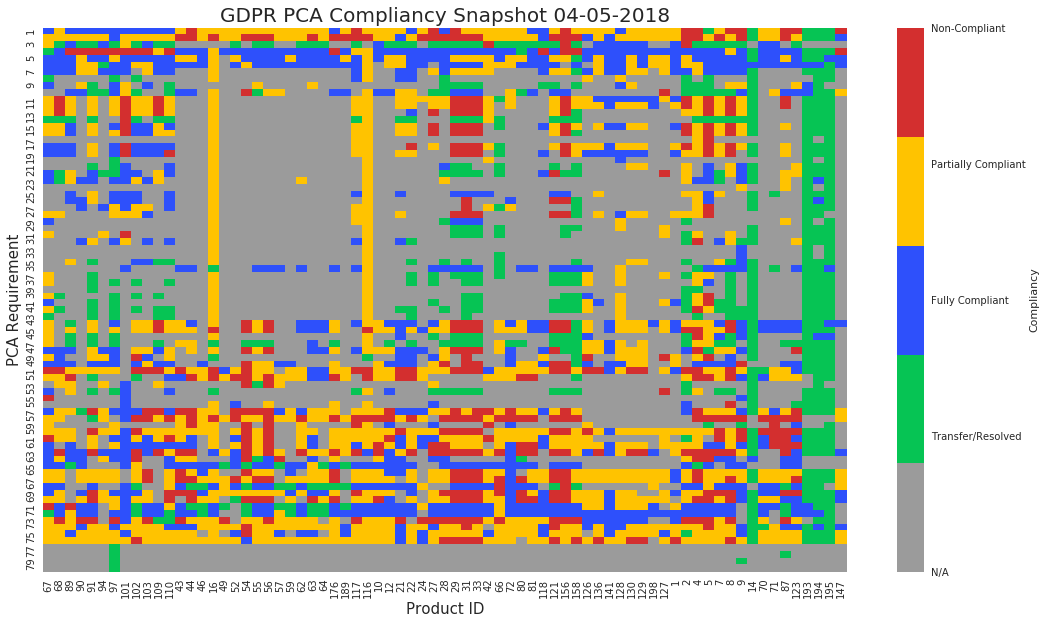

In [329]:
f, ax = plt.subplots(figsize=(18, 10))
#f.colorbar
cmap=mcolors.ListedColormap([GREY,
                             GREEN,
                             BLUE,
                             AMBER,
                             RED])
zx = sns.heatmap(pca_rollup_target, ax=ax, square=False, cmap=cmap, yticklabels='auto', cbar_kws={"orientation": "vertical","label": "Compliancy"})
title = "GDPR PCA Compliancy Snapshot "+today
plt.title(title, size=20)
plt.xlabel('Product ID', size=15)
plt.ylabel('PCA Requirement', size=15)
cbar = zx.collections[0].colorbar
cbar.set_ticks([1, 2, 3, 4, 5])
cbar.set_ticklabels(['N/A',
                     'Transfer/Resolved',
                     'Fully Compliant', 
                     'Partially Compliant', 
                     'Non-Compliant'])

f.savefig(OUTPUT_BASE_DIR+"/PCA-Compliancy-Heatmap-"+today+".png")

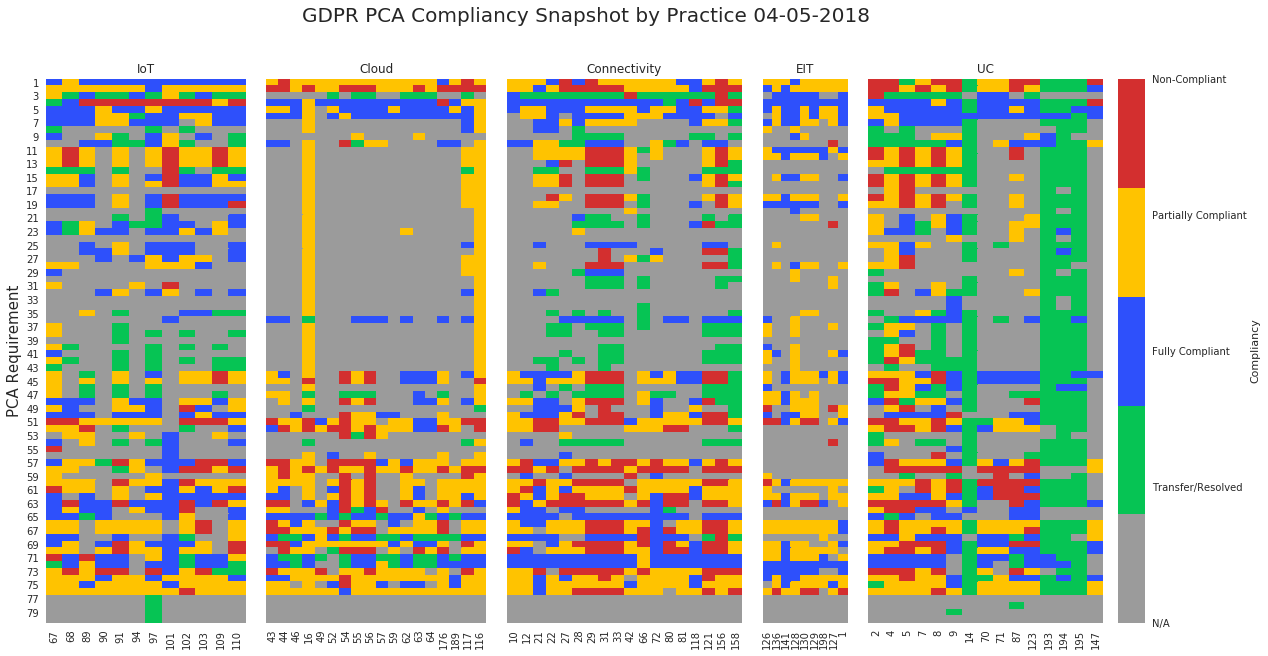

In [330]:
# create subplots
pca_rollup_target.columns.name = ""

baseline_iot_heatmap = pca_rollup_target[iot_cols]
baseline_cloud_heatmap = pca_rollup_target[cloud_cols]
baseline_connectivity_heatmap = pca_rollup_target[connectivity_cols]
baseline_eit_heatmap = pca_rollup_target[eit_cols]
baseline_uc_heatmap = pca_rollup_target[uc_cols]

f, (ax, ax1, ax2, ax3, ax4) = plt.subplots(ncols=5, sharex=False, sharey=True, figsize=(20, 10), 
                                           gridspec_kw={"width_ratios":[0.68,0.75,0.8,0.29,1]})
#f.colorbar
f.subplots_adjust(hspace=0.1,wspace=0.1)
#f.subplots_adjust(right=0.5)

#cmap=mcolors.ListedColormap(['#9B9B9B',
#                             '#06C454',
#                             '#2E50FB',
#                             '#FFC300',
#                             '#C70039'])
cmap=mcolors.ListedColormap([GREY,
                             GREEN,
                             BLUE,
                             AMBER,
                             RED])


title = "GDPR PCA Compliancy Snapshot by Practice "+today
f.suptitle(title, size=20)


zx = sns.heatmap(baseline_iot_heatmap, ax=ax, square=False, cmap=cmap, cbar=False, yticklabels=True, xticklabels=True)

ax.set_title('IoT')
ax.set_ylabel('PCA Requirement', size=15)

zx1 = sns.heatmap(baseline_cloud_heatmap, ax=ax1, square=False, cmap=cmap, cbar=False, xticklabels=True)
ax1.set_title('Cloud')

zx2 = sns.heatmap(baseline_connectivity_heatmap, ax=ax2, square=False, cmap=cmap, cbar=False, xticklabels=True)
ax2.set_title('Connectivity')

zx3 = sns.heatmap(baseline_eit_heatmap, ax=ax3, square=False, cmap=cmap, cbar=False, xticklabels=True)
ax3.set_title('EIT')

zx4 = sns.heatmap(baseline_uc_heatmap, ax=ax4, square=False, cmap=cmap, xticklabels=True, cbar_kws={"orientation": "vertical","label": "Compliancy"})
ax4.set_title('UC')

cbar = zx4.collections[0].colorbar
cbar.set_ticks([1, 2, 3, 4, 5])
cbar.set_ticklabels(['N/A',
                     'Transfer/Resolved',
                     'Fully Compliant', 
                     'Partially Compliant', 
                     'Non-Compliant'])

f.savefig(OUTPUT_BASE_DIR+"/PCA-Per-Practice-Heatmap-"+today+".png")

In [331]:
input_heatmap.fillna(1,inplace=True)
input_heatmap
output_writer = pd.ExcelWriter('./dump.xlsx')
input_heatmap.to_excel(output_writer, 'heatmap')
output_writer.save()

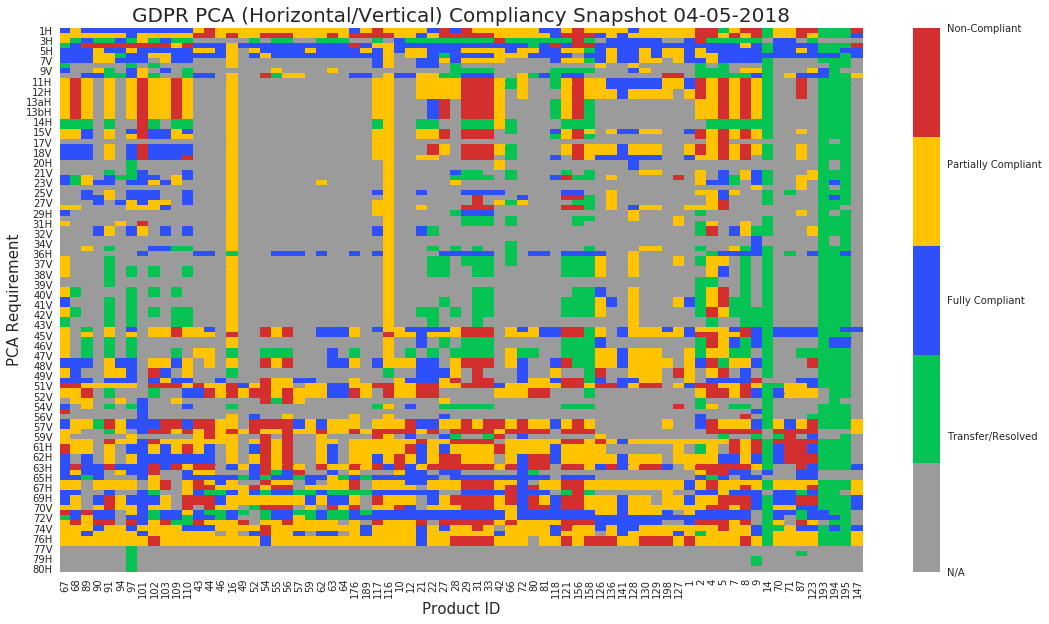

In [332]:
f, ax = plt.subplots(figsize=(18, 10))
#f.colorbar
cmap=mcolors.ListedColormap([GREY,
                             GREEN,
                             BLUE,
                             AMBER,
                             RED])

zx = sns.heatmap(input_heatmap, ax=ax, square=False, cmap=cmap)
title = "GDPR PCA (Horizontal/Vertical) Compliancy Snapshot "+today
plt.title(title, size=20)
plt.xlabel('Product ID', size=15)
plt.ylabel('PCA Requirement', size=15)
cbar = zx.collections[0].colorbar
cbar.set_ticks([1, 2, 3, 4, 5])
cbar.set_ticklabels(['N/A',
                     'Transfer/Resolved',
                     'Fully Compliant', 
                     'Partially Compliant', 
                     'Non-Compliant'])

In [333]:
f.savefig(OUTPUT_BASE_DIR+"/HV-Breakdown-Compliancy-Heatmap-"+today+".png")

In [334]:
# create subplots
iot_heatmap = input_heatmap[iot_cols]
cloud_heatmap = input_heatmap[cloud_cols]
connectivity_heatmap = input_heatmap[connectivity_cols]
eit_heatmap = input_heatmap[eit_cols]
uc_heatmap = input_heatmap[uc_cols]

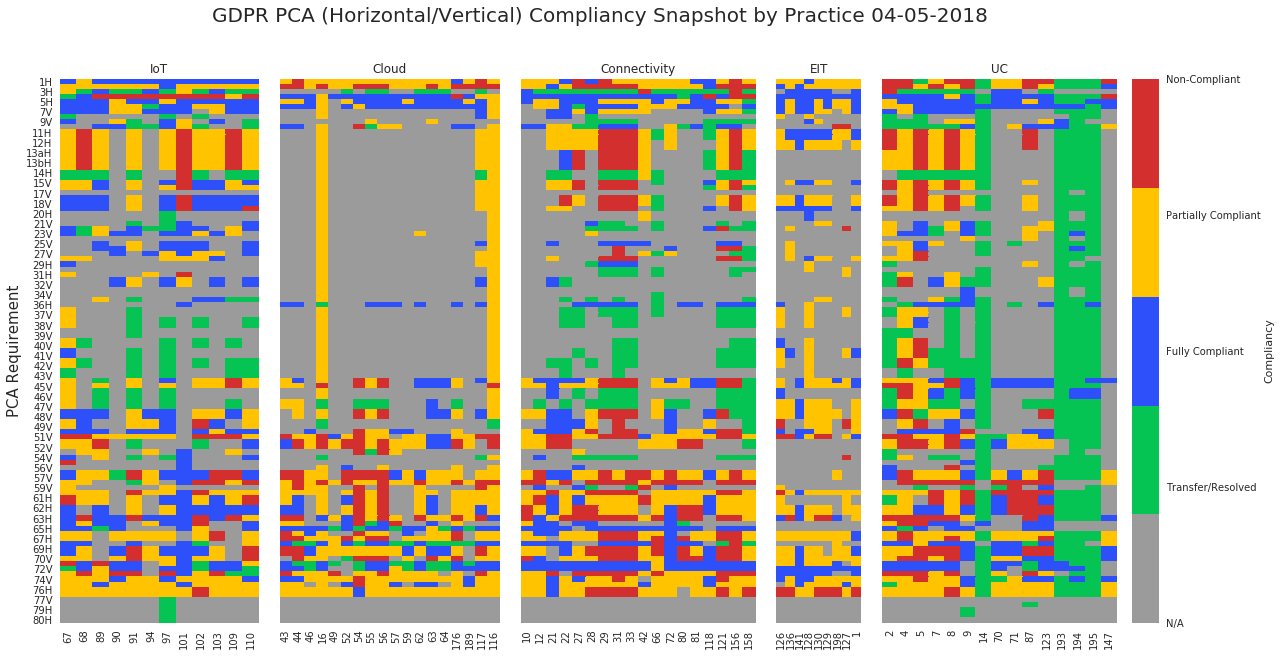

In [335]:
f, (ax, ax1, ax2, ax3, ax4) = plt.subplots(ncols=5, sharex=False, sharey=True, figsize=(20, 10), 
                                           gridspec_kw={"width_ratios":[0.68,0.75,0.8,0.29,1]})
#f.colorbar
f.subplots_adjust(hspace=0.1,wspace=0.1)
#f.subplots_adjust(right=0.5)

cmap=mcolors.ListedColormap([GREY,
                             GREEN,
                             BLUE,
                             AMBER,
                             RED])

title = "GDPR PCA (Horizontal/Vertical) Compliancy Snapshot by Practice "+today
f.suptitle(title, size=20)


zx = sns.heatmap(iot_heatmap, ax=ax, square=False, cmap=cmap, cbar=False, yticklabels=True, xticklabels=True)
#zx1 = sns.heatmap(cloud_heatmap, ax=ax1, square=False, cmap=cmap, cbar=False)
ax.set_title('IoT')
ax.set_ylabel('PCA Requirement', size=15)

zx1 = sns.heatmap(cloud_heatmap, ax=ax1, square=False, cmap=cmap, cbar=False, xticklabels=True)
ax1.set_title('Cloud')

zx2 = sns.heatmap(connectivity_heatmap, ax=ax2, square=False, cmap=cmap, cbar=False, xticklabels=True)
ax2.set_title('Connectivity')

zx3 = sns.heatmap(eit_heatmap, ax=ax3, square=False, cmap=cmap, cbar=False, xticklabels=True)
ax3.set_title('EIT')


zx4 = sns.heatmap(uc_heatmap, ax=ax4, square=False, cmap=cmap, cbar_kws={"orientation": "vertical","label": "Compliancy"}, xticklabels=True)
ax4.set_title('UC')


#plt.annotate('Something', (0,0))
#plt.xlabel('Product ID', size=15)
#plt.ylabel('PCA Requirement', size=15)

cbar = zx4.collections[0].colorbar
cbar.set_ticks([1, 2, 3, 4, 5])
cbar.set_ticklabels(['N/A',
                     'Transfer/Resolved',
                     'Fully Compliant', 
                     'Partially Compliant', 
                     'Non-Compliant'])

#f.tight_layout(rect=[0, 0, 0.9, 0.9])

#cbar = zx1.collections[0].colorbar
#cbar.set_ticks([0, 1, 2, 3, 4, 5, 6])
#cbar.set_ticklabels(['0:Out of Scope from DPIA',
#                     '1:N/A', 
#                     '2:Fully Compliant', 
#                     '3:Partially Compliant f',
#                     '4:Partially Compliant', 
#                     '5:Non-Compliant f', 
#                     '6:Non-Compliant'])

f.savefig(OUTPUT_BASE_DIR+"/HV-Breakdown-Per-Practice-Heatmap-"+today+".png")

In [336]:
# create burndowns
pca_df.head()

gap_counter = set([

    'PARTIALLY COMPLIANT ',
    'NON-COMPLIANT ',
    'PARTIALLY COMPLIANT f',
    'NON-COMPLIANT',
    'NON-COMPLIANT f',
    'PARTIALLY COMPLIANT']
)


#burndown_df = pd.DataFrame(index=['IoT','Cloud','Connectivity','EIT','UC', 'Total'], columns=[week_num])

#output_writer = pd.ExcelWriter('./burndown.xlsx')
#burndown_df.to_excel(output_writer, 'PCA Burndown')
#output_writer.save()


In [337]:
#start_date = datetime.today()
#end_date = date(2018,6,1)


#end_date.strftime('%d-%m-%Y')
#end_date = end_date + timedelta(days=7)
#end_date.strftime('%d-%m-%Y')

In [338]:
#start_date.strftime('%Y Week %W')

In [339]:
iot_compliance = pca_df['Compliance Assessment'][pca_df['Practice']=='IoT'].value_counts()
cloud_compliance = pca_df['Compliance Assessment'][pca_df['Practice']=='Cloud'].value_counts()
connectivity_compliance = pca_df['Compliance Assessment'][pca_df['Practice']=='Connectivity'].value_counts()
eit_compliance = pca_df['Compliance Assessment'][pca_df['Practice']=='EIT'].value_counts()
uc_compliance = pca_df['Compliance Assessment'][pca_df['Practice']=='UC'].value_counts()

In [340]:
iot_compliance

PARTIALLY COMPLIANT      768
NON-COMPLIANT            225
PARTIALLY COMPLIANT f    145
NON-COMPLIANT             17
PARTIALLY COMPLIANT       10
Name: Compliance Assessment, dtype: int64

In [341]:
iot_gap = 0
cloud_gap = 0
connectivity_gap = 0
eit_gap = 0
uc_gap = 0

for key in iot_compliance.keys():
    if key in gap_counter:
        iot_gap = iot_gap + iot_compliance[key]

for key in cloud_compliance.keys():
    if key in gap_counter:
        cloud_gap = cloud_gap + cloud_compliance[key]

for key in connectivity_compliance.keys():
    if key in gap_counter:
        connectivity_gap = connectivity_gap + connectivity_compliance[key]

for key in eit_compliance.keys():
    if key in gap_counter:
        eit_gap = eit_gap + eit_compliance[key]

for key in uc_compliance.keys():
    if key in gap_counter:
        uc_gap = uc_gap + uc_compliance[key]

total_gap = iot_gap + cloud_gap + connectivity_gap + eit_gap + uc_gap
print total_gap

5706


In [342]:
#burndown_df.head()

pca_burndown_df = pd.read_excel('./burndown.xlsx', sheet_name='PCA Burndown')
rolled_up_pca_burndown_df = pd.read_excel('./burndown.xlsx', sheet_name='PCA Burndown Rolled Up')
sca_burndown_df = pd.read_excel('./burndown.xlsx', sheet_name='SCA Burndown')

pca_burndown_df.columns.name = 'Week #'
pca_burndown_df.head(10)

Week #,2018 Week 18
IoT,1165
Cloud,579
Connectivity,2000
EIT,300
UC,1662
Total,5706


In [343]:
pca_burndown_df[week_num] = [iot_gap, cloud_gap, connectivity_gap, eit_gap, uc_gap, total_gap]
pca_burndown_df[week_num]['Total']

5706

In [344]:
list(pca_burndown_df.loc['Total'])

[5706]

In [345]:
pca_burndown_df.head(10)


Week #,2018 Week 18
IoT,1165
Cloud,579
Connectivity,2000
EIT,300
UC,1662
Total,5706


In [346]:
pca_rollup_target.replace(to_replace=1, value=PCA_COMPLIANCE_INVERSE.get(1), inplace=True)
pca_rollup_target.replace(to_replace=2, value=PCA_COMPLIANCE_INVERSE.get(2), inplace=True)
pca_rollup_target.replace(to_replace=3, value=PCA_COMPLIANCE_INVERSE.get(3), inplace=True)
pca_rollup_target.replace(to_replace=4, value=PCA_COMPLIANCE_INVERSE.get(4), inplace=True)
pca_rollup_target.replace(to_replace=5, value=PCA_COMPLIANCE_INVERSE.get(5), inplace=True)

new_compliancy_stats = pca_rollup_target.apply(pd.Series.value_counts)
new_compliancy_stats

new_compliancy_stats.fillna(0, inplace=True)
new_compliancy_stats['Total'] = 0
new_compliancy_stats.loc['FULLY COMPLIANT', 'Total'] = new_compliancy_stats.loc['FULLY COMPLIANT'].sum()
new_compliancy_stats.loc['N/A', 'Total'] = new_compliancy_stats.loc['N/A'].sum()
new_compliancy_stats.loc['NON-COMPLIANT', 'Total'] = new_compliancy_stats.loc['NON-COMPLIANT'].sum()
new_compliancy_stats.loc['PARTIALLY COMPLIANT', 'Total'] = new_compliancy_stats.loc['PARTIALLY COMPLIANT'].sum()
new_compliancy_stats.loc['RESOLVED/TRANSFERED', 'Total'] = new_compliancy_stats.loc['RESOLVED/TRANSFERED'].sum()

iot_burndown_stats = new_compliancy_stats[iot_cols]
cloud_burndown_stats = new_compliancy_stats[cloud_cols]
connectivity_burndown_stats = new_compliancy_stats[connectivity_cols]
eit_burndown_stats = new_compliancy_stats[eit_cols]
uc_burndown_stats = new_compliancy_stats[uc_cols]


#for c in new_compliancy_stats.columns:
#    new_compliancy_stats.loc['Total',c] = new_compliancy_stats[c].sum()

#new_compliancy_stats.loc['Total','Total'] = new_compliancy_stats['Total'].sum()

new_compliancy_stats

,67,68,89,90,91,94,97,101,102,103,...,14,70,71,87,123,193,194,195,147,Total
FULLY COMPLIANT,21,13,18,13,8,8,24,30.0,14,18.0,...,2.0,13,10,10,19,5.0,6.0,4.0,8.0,820.0
N/A,21,36,36,52,23,52,19,32.0,28,38.0,...,17.0,54,52,39,40,13.0,15.0,12.0,62.0,2825.0
NON-COMPLIANT,4,6,3,2,7,1,2,10.0,8,7.0,...,0.0,2,5,11,8,0.0,0.0,0.0,2.0,472.0
PARTIALLY COMPLIANT,29,19,18,11,25,16,18,8.0,19,17.0,...,0.0,9,11,15,10,0.0,0.0,0.0,8.0,1115.0
RESOLVED/TRANSFERED,5,6,5,2,17,3,17,0.0,11,0.0,...,61.0,2,2,5,3,62.0,59.0,64.0,0.0,608.0


In [347]:
iot_gap = iot_burndown_stats.loc['NON-COMPLIANT'].sum() + iot_burndown_stats.loc['PARTIALLY COMPLIANT'].sum()
cloud_gap = cloud_burndown_stats.loc['NON-COMPLIANT'].sum() + cloud_burndown_stats.loc['PARTIALLY COMPLIANT'].sum()
connectivity_gap = connectivity_burndown_stats.loc['NON-COMPLIANT'].sum() + connectivity_burndown_stats.loc['PARTIALLY COMPLIANT'].sum()
eit_gap = eit_burndown_stats.loc['NON-COMPLIANT'].sum() + eit_burndown_stats.loc['PARTIALLY COMPLIANT'].sum()
uc_gap = uc_burndown_stats.loc['NON-COMPLIANT'].sum() + uc_burndown_stats.loc['PARTIALLY COMPLIANT'].sum()

total_gap = iot_gap + cloud_gap + connectivity_gap + eit_gap + uc_gap

rolled_up_pca_burndown_df[week_num] = [iot_gap, cloud_gap, connectivity_gap, eit_gap, uc_gap, total_gap]
rolled_up_pca_burndown_df[week_num]['Total']

rolled_up_pca_burndown_df.fillna(0,inplace=True)
rolled_up_pca_burndown_df


,2018 Week 3,2018 Week 16,2018 Week 18
IoT,0.0,0.0,275.0
Cloud,0.0,0.0,407.0
Connectivity,0.0,0.0,428.0
EIT,0.0,0.0,188.0
UC,0.0,0.0,278.0
Total,2173.0,1687.0,1576.0


In [348]:
iot

[2, 5, 275]

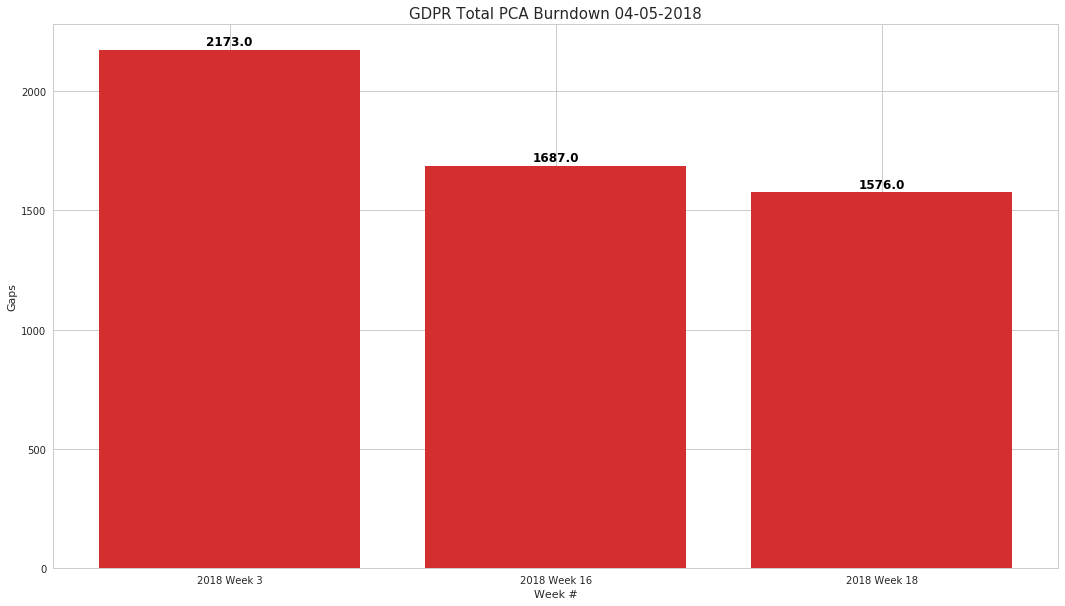

In [349]:
f, ax = plt.subplots(figsize=(18, 10))
bars = list(rolled_up_pca_burndown_df.loc['Total'])
xticks = list(rolled_up_pca_burndown_df.columns)

#bar1.append(pca_burndown_df[today]['Total'])

#xticks.append(today)

font = {'family': 'sans serif',
        'color':  'black',
        'weight': 'bold',
        'size': 12,
        }

x= np.arange(len(bars))


plt.bar(x, bars, color=RED)

for a,b in zip(x, bars):
    plt.text(a, b+20, str(b), font, horizontalalignment='center')

plt.xticks(x, xticks)
plt.xlabel("Week #")
plt.ylabel("Gaps")
plt.title("GDPR Total PCA Burndown "+today, size=15)
f.savefig(OUTPUT_BASE_DIR+"/PCA-Burndown-"+today+".png")

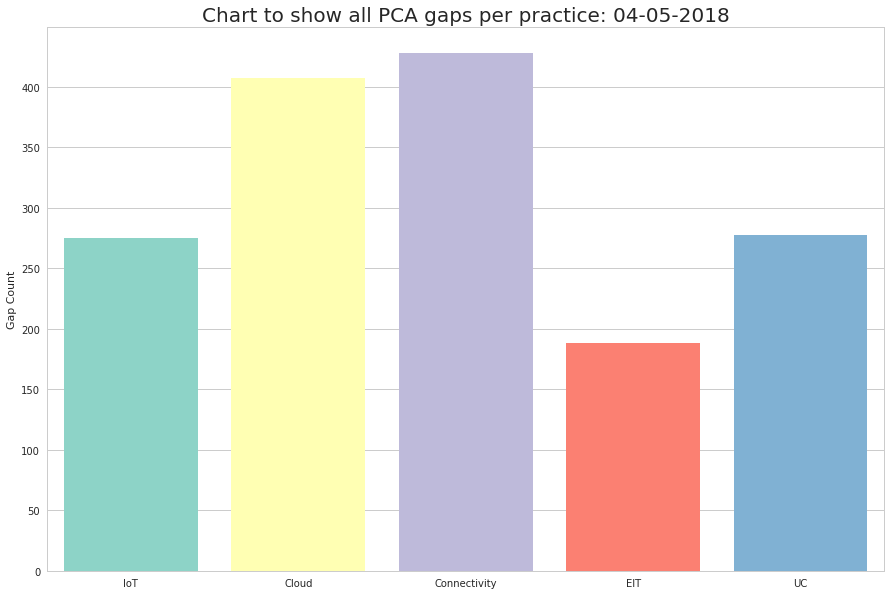

In [350]:
fig, ax = plt.subplots(figsize=(15,10))

x = ['IoT', 'Cloud', 'Connectivity', 'EIT', 'UC']
y = [iot_gap, cloud_gap, connectivity_gap, eit_gap, uc_gap]

sns.barplot(x=x, y=y, saturation=1, palette='Set3')

ax.set_ylabel("Gap Count")
#ax.set_xlabel(today)
ax.set_title("Chart to show all PCA gaps per practice: "+today, size=20)
fig.savefig(OUTPUT_BASE_DIR+"/PCA-Burndown-Per-Practice-"+today+".png")

In [351]:
#output_writer = pd.ExcelWriter('./burndown.xlsx')
#burndown_df.to_excel(output_writer, 'PCA Burndown')
#output_writer.save()
sca_df.head()

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA
63,4 - Broadly adequate / Observation,NaT,1.0,GDPR-RS-EPS054-Hosting Solution Management-V4....,54,No Response,EPS054-SCA-12.4.3-A,12.4.3,No Response,NaN,EPS054-SCA-12.4.3,SCA,No Project Code,Cloud,UNKNOWN,NaN,NaN,NaN
64,3 - Partially adequate / Minor Non-Conformity ...,NaT,1.0,GDPR-RS-EPS054-Hosting Solution Management-V4....,54,No Response,EPS054-SCA-14.1.2-A,14.1.2,No Response,NaN,EPS054-SCA-14.1.2,SCA,No Project Code,Cloud,UNKNOWN,NaN,NaN,NaN
65,2 - Inadequate / Minor Non-Conformity (high se...,NaT,1.0,GDPR-RS-EPS054-Hosting Solution Management-V4....,54,No Response,EPS054-SCA-18.1.4-A,18.1.4,No Response,NaN,EPS054-SCA-18.1.4,SCA,No Project Code,Cloud,UNKNOWN,NaN,NaN,NaN
66,4 - Broadly adequate / Observation,NaT,1.0,GDPR-RS-EPS054-Hosting Solution Management-V4....,54,No Response,EPS054-SCA-9.2.1-A-A,9.2.1-A,No Response,NaN,EPS054-SCA-9.2.1-A,SCA,No Project Code,Cloud,UNKNOWN,NaN,NaN,NaN
67,4 - Broadly adequate / Observation,NaT,1.0,GDPR-RS-EPS054-Hosting Solution Management-V4....,54,No Response,EPS054-SCA-9.2.6-A-A,9.2.6-A,No Response,NaN,EPS054-SCA-9.2.6-A,SCA,No Project Code,Cloud,UNKNOWN,NaN,NaN,NaN


In [352]:
for p in COLS:
    prod_filter = sca_df['Product ID'] == p
    prod_df = sca_df[prod_filter]
    
    for r in prod_df['Req Ref']:
        sca = r[11:-2]
        if sca in SCA_INDEX:
            compliance_value = SCA_COMPLIANCE.get(prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0], 0)

            if SCA_COMPLIANCE.get(sca_heatmap_df.loc[sca][p], 0) <= compliance_value:
                sca_heatmap_df.loc[sca][p] = prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]
            else:
                print("2: Compliance Value: {0:s}".format(prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]))
                print("2: Heatmap Value: {0}".format(sca_heatmap_df.loc[sca][p]))
                sys.exit("EXIT")
            
            #print r
            #print heatmap_df.loc[r][p]
        else:
            if sca in converter.keys():
                print "not in index"
                sca_heatmap_df.loc[converter.get(sca)][p] = prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]
            else:
                print("Req nr not in index: {0}".format(r))
                if sca == 13:
                    sca_heatmap_df.loc['13aV'][p] = prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]
                    sca_heatmap_df.loc['13bV'][p] = prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]
                    
            

In [353]:

sca_compliancy_stats = sca_heatmap_df.apply(pd.Series.value_counts)

sca_compliancy_stats.fillna(0, inplace=True)
sca_compliancy_stats['Total'] = 0
sca_compliancy_stats.loc['1 - Very Inadequate / Major Non-Conformity', 'Total'] = sca_compliancy_stats.loc['1 - Very Inadequate / Major Non-Conformity'].sum()
sca_compliancy_stats.loc['2 - Inadequate / Minor Non-Conformity (high severity)', 'Total'] = sca_compliancy_stats.loc['2 - Inadequate / Minor Non-Conformity (high severity)'].sum()
sca_compliancy_stats.loc['3 - Partially adequate / Minor Non-Conformity (low severity)', 'Total'] = sca_compliancy_stats.loc['3 - Partially adequate / Minor Non-Conformity (low severity)'].sum()
sca_compliancy_stats.loc['4 - Broadly adequate / Observation', 'Total'] = sca_compliancy_stats.loc['4 - Broadly adequate / Observation'].sum()

iot_sca_burndown_stats = sca_compliancy_stats[iot_cols]
cloud_sca_burndown_stats = sca_compliancy_stats[cloud_cols]
connectivity_sca_burndown_stats = sca_compliancy_stats[connectivity_cols]
eit_sca_burndown_stats = sca_compliancy_stats[eit_cols]
uc_sca_burndown_stats = sca_compliancy_stats[uc_cols]

iot_gap = iot_sca_burndown_stats.loc['1 - Very Inadequate / Major Non-Conformity'].sum() + \
        iot_sca_burndown_stats.loc['2 - Inadequate / Minor Non-Conformity (high severity)'].sum() + \
        iot_sca_burndown_stats.loc['3 - Partially adequate / Minor Non-Conformity (low severity)'].sum() #+ \
        #iot_sca_burndown_stats.loc['4 - Broadly adequate / Observation'].sum()
                                    
cloud_gap = cloud_sca_burndown_stats.loc['1 - Very Inadequate / Major Non-Conformity'].sum() + \
        cloud_sca_burndown_stats.loc['2 - Inadequate / Minor Non-Conformity (high severity)'].sum() + \
        cloud_sca_burndown_stats.loc['3 - Partially adequate / Minor Non-Conformity (low severity)'].sum() #+ \
        #cloud_sca_burndown_stats.loc['4 - Broadly adequate / Observation'].sum()
        
connectivity_gap = connectivity_sca_burndown_stats.loc['1 - Very Inadequate / Major Non-Conformity'].sum() + \
        connectivity_sca_burndown_stats.loc['2 - Inadequate / Minor Non-Conformity (high severity)'].sum() + \
        connectivity_sca_burndown_stats.loc['3 - Partially adequate / Minor Non-Conformity (low severity)'].sum() #+ \
        #connectivity_sca_burndown_stats.loc['4 - Broadly adequate / Observation'].sum()

eit_gap = eit_sca_burndown_stats.loc['1 - Very Inadequate / Major Non-Conformity'].sum() + \
        eit_sca_burndown_stats.loc['2 - Inadequate / Minor Non-Conformity (high severity)'].sum() + \
        eit_sca_burndown_stats.loc['3 - Partially adequate / Minor Non-Conformity (low severity)'].sum() #+ \
        #eit_sca_burndown_stats.loc['4 - Broadly adequate / Observation'].sum()

uc_gap = uc_sca_burndown_stats.loc['1 - Very Inadequate / Major Non-Conformity'].sum() + \
        uc_sca_burndown_stats.loc['2 - Inadequate / Minor Non-Conformity (high severity)'].sum() + \
        uc_sca_burndown_stats.loc['3 - Partially adequate / Minor Non-Conformity (low severity)'].sum() #+ \
        #uc_sca_burndown_stats.loc['4 - Broadly adequate / Observation'].sum()


total_gap = iot_gap + cloud_gap + connectivity_gap + eit_gap + uc_gap

sca_burndown_df[week_num] = [iot_gap, cloud_gap, connectivity_gap, eit_gap, uc_gap, total_gap]
sca_burndown_df[week_num]['Total']

sca_burndown_df.fillna(0,inplace=True)



In [354]:
sca_compliancy_stats

,67,68,89,90,91,94,97,101,102,103,...,14,70,71,87,123,193,194,195,147,Total
1 - Very Inadequate / Major Non-Conformity,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
2 - Inadequate / Minor Non-Conformity (high severity),1.0,1.0,2.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,104.0
3 - Partially adequate / Minor Non-Conformity (low severity),7.0,7.0,12.0,0.0,4.0,1.0,5.0,5.0,5.0,5.0,...,0.0,2.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,209.0
4 - Broadly adequate / Observation,6.0,6.0,0.0,0.0,0.0,10.0,8.0,8.0,8.0,8.0,...,10.0,6.0,4.0,8.0,6.0,0.0,8.0,1.0,15.0,385.0


In [355]:
sca_burndown_df

,2018 Week 3,2018 Week 16,2018 Week 18
IoT,0.0,0.0,89.0
Cloud,0.0,0.0,89.0
Connectivity,0.0,0.0,97.0
EIT,0.0,0.0,32.0
UC,0.0,0.0,30.0
Total,0.0,0.0,337.0


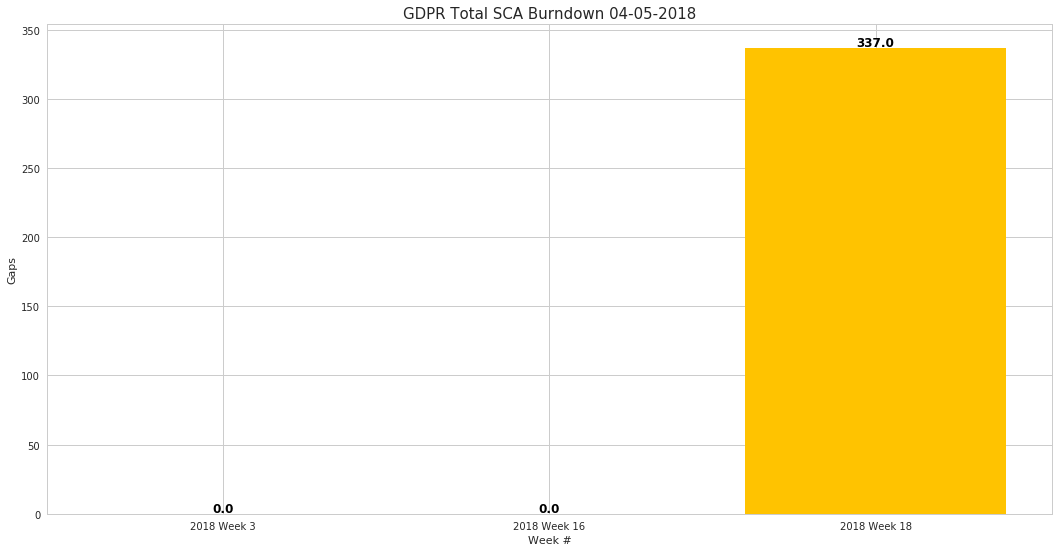

In [356]:
f, ax = plt.subplots(figsize=(18, 10))
f.subplots_adjust(bottom=0.2,hspace=0.5,wspace=0.5)

bars = list(sca_burndown_df.loc['Total'])
xticks = list(sca_burndown_df.columns)

#bar1.append(pca_burndown_df[today]['Total'])

#xticks.append(today)

font = {'family': 'sans serif',
        'color':  'black',
        'weight': 'bold',
        'size': 12,
        }

x= np.arange(len(bars))


plt.bar(x, bars, color=AMBER)

for a,b in zip(x, bars):
    plt.text(a, b+1, str(b), font, horizontalalignment='center')

plt.xticks(x, xticks)
plt.xlabel("Week #")
plt.ylabel("Gaps")
plt.title("GDPR Total SCA Burndown "+today, size=15)
f.savefig(OUTPUT_BASE_DIR+"/SCA-Burndown-"+today+".png")

In [357]:
output_writer = pd.ExcelWriter('./burndown.xlsx')
pca_burndown_df.to_excel(output_writer, 'PCA Burndown')
rolled_up_pca_burndown_df.to_excel(output_writer, 'PCA Burndown Rolled Up')
sca_burndown_df.to_excel(output_writer, 'SCA Burndown')
output_writer.save()

In [358]:
COLUMNS = ['PRIVACY_REQUIREMENT_CONTENT', 'REQ_NO', 'VERTICAL', 'HORIZONTAL', 'HYBRID', 'PC', 'NC']

INDEX = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

set_a = set(['1H','2H','3H'])
set_b = set(['4H','5H','6V','7V','8H'])
set_c = set(['9V','10V'])
set_d = set(['11H','11V','12H','12V','13aH','13aV','13bH','13bV','14H','14V','15V','16V','17V','18H','18V','19V','20H','20V'])
set_e = set(['21V','22V','23V','24V','25V','26V','27V','28V','29H','30H','31H','32H','32V','33V','34V','35H','36H','37H','37V','38H',
             '38V','39H','39V','40H','40V','41H','41V','42H','42V','43H','43V'])
set_f = set(['44V','45V','46H','46V','47H','47V','48H','48V','49H','49V','50H','51V','52H','52V','53V','54V','55V','56V','57H','57V','58H'])
set_g = set(['59V','60H','61H','61V','62H','62V','63H','64H','65H','66H','67H','68H','69H','69V','70V','71V','72V','73H'])
set_h = set(['74V','75H','76H','76V','77V'])
set_i = set(['78V','79H','79V','80H'])

requirement_content = ['Define privacy responsibilities, document the data being processed, \
conduct privacy risk assessments and control identification (Privacy by Design), and ensure business accountability \
for implementation of controls and residual risks',
                      'Collection and purpose limitation',
                      'Protect confidentiality of communications and sensitive information',
                      'Provide a clear and understandable privacy notice',
                      'Obtain and manage necessary permissions for processing communications content, \
                      traffic data, location data, marketing, analytics and processing of sensitive data',
                      'Manage data diligently to maintain its accuracy and quality across product life cycle, not \
                      retain data for longer than is necessary and ensure rights and obligations related to data carry \
                      over to all instances of data',
                      'Design product to enable data subject’s right to access data, request deletion and data portability',
                      'Do not disclose personal data to unauthorized governmental agencies and ensure suppliers comply with \
                      Vodafone privacy and security requirements',
                      'Apply effective technical and organisational controls to protect personal data against unauthorized access, \
                      use, disclosure, modification or loss ',
                      'Acquire parental consents when providing information society services (online services) directly to children, use child appropriate language, \
                      avoid profiling of children and protect child personal data against unwanted disclosure']

vertical = [15, ]

all_risk_df = pd.DataFrame(columns=COLUMNS, index=INDEX)

all_risk_df['PRIVACY_REQUIREMENT_CONTENT'] = requirement_content

In [359]:
PCA_COMPLIANCE_INVERSE.get(input_heatmap.loc['1H'][67])

'FULLY COMPLIANT'

In [360]:
all_risk_df

,PRIVACY_REQUIREMENT_CONTENT,REQ_NO,VERTICAL,HORIZONTAL,HYBRID,PC,NC
A,"Define privacy responsibilities, document the ...",NaN,NaN,NaN,NaN,NaN,NaN
B,Collection and purpose limitation,NaN,NaN,NaN,NaN,NaN,NaN
C,Protect confidentiality of communications and ...,NaN,NaN,NaN,NaN,NaN,NaN
D,Provide a clear and understandable privacy notice,NaN,NaN,NaN,NaN,NaN,NaN
E,Obtain and manage necessary permissions for pr...,NaN,NaN,NaN,NaN,NaN,NaN
F,Manage data diligently to maintain its accurac...,NaN,NaN,NaN,NaN,NaN,NaN
G,Design product to enable data subject’s right ...,NaN,NaN,NaN,NaN,NaN,NaN
H,Do not disclose personal data to unauthorized ...,NaN,NaN,NaN,NaN,NaN,NaN
I,Apply effective technical and organisational c...,NaN,NaN,NaN,NaN,NaN,NaN
J,Acquire parental consents when providing infor...,NaN,NaN,NaN,NaN,NaN,NaN


In [361]:
sca_heatmap_df.replace(to_replace='0 - n/a', value=0, inplace=True)
sca_heatmap_df.replace(to_replace='1 - Very Inadequate / Major Non-Conformity', value=1, inplace=True)
sca_heatmap_df.replace(to_replace='2 - Inadequate / Minor Non-Conformity (high severity)', value=2, inplace=True)
sca_heatmap_df.replace(to_replace='3 - Partially adequate / Minor Non-Conformity (low severity)', value=3, inplace=True)
sca_heatmap_df.replace(to_replace='4 - Broadly adequate / Observation', value=4, inplace=True)
sca_heatmap_df.replace(to_replace='5 - Substantially adequate / Compliant', value=5, inplace=True)

sca_heatmap_df.fillna(0, inplace=True)

sca_heatmap_df

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
9.2.1-A,3.0,3.0,3.0,0.0,3.0,4.0,4.0,4.0,4.0,4.0,...,0.0,4.0,3.0,4.0,0.0,3.0,0.0,4.0,0.0,4
9.2.2,3.0,3.0,3.0,0.0,3.0,4.0,4.0,4.0,4.0,4.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
9.2.3,3.0,3.0,3.0,0.0,2.0,4.0,4.0,4.0,4.0,4.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
9.2.5,3.0,3.0,3.0,0.0,2.0,4.0,4.0,4.0,4.0,4.0,...,2.0,4.0,3.0,0.0,4.0,3.0,0.0,4.0,0.0,4
9.2.6-A,3.0,3.0,3.0,0.0,2.0,3.0,3.0,3.0,3.0,3.0,...,2.0,4.0,2.0,0.0,0.0,2.0,0.0,4.0,0.0,4
9.2.6-B,3.0,3.0,3.0,0.0,2.0,4.0,3.0,3.0,3.0,3.0,...,3.0,4.0,2.0,4.0,0.0,2.0,0.0,4.0,0.0,4
9.4.1,4.0,4.0,3.0,0.0,3.0,4.0,4.0,4.0,4.0,4.0,...,0.0,4.0,4.0,0.0,0.0,4.0,0.0,4.0,0.0,4
9.4.2,4.0,4.0,3.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,0.0,4.0,4.0,0.0,4.0,0.0,4
12.4.1,4.0,4.0,3.0,0.0,2.0,4.0,4.0,4.0,4.0,4.0,...,1.0,4.0,4.0,0.0,4.0,4.0,0.0,3.0,0.0,4
12.4.3,4.0,4.0,3.0,0.0,2.0,4.0,3.0,3.0,3.0,3.0,...,2.0,4.0,4.0,0.0,4.0,4.0,0.0,3.0,0.0,4


# Build SCA Heatmaps

In [362]:
#SCA Heatmaps
# create subplots
sca_heatmap_df.columns.name = " "

iot_sca_heatmap_df = sca_heatmap_df[iot_cols]
cloud_sca_heatmap_df = sca_heatmap_df[cloud_cols]
connectivity_sca_heatmap_df = sca_heatmap_df[connectivity_cols]
eit_sca_heatmap_df = sca_heatmap_df[eit_cols]
uc_sca_heatmap_df = sca_heatmap_df[uc_cols]



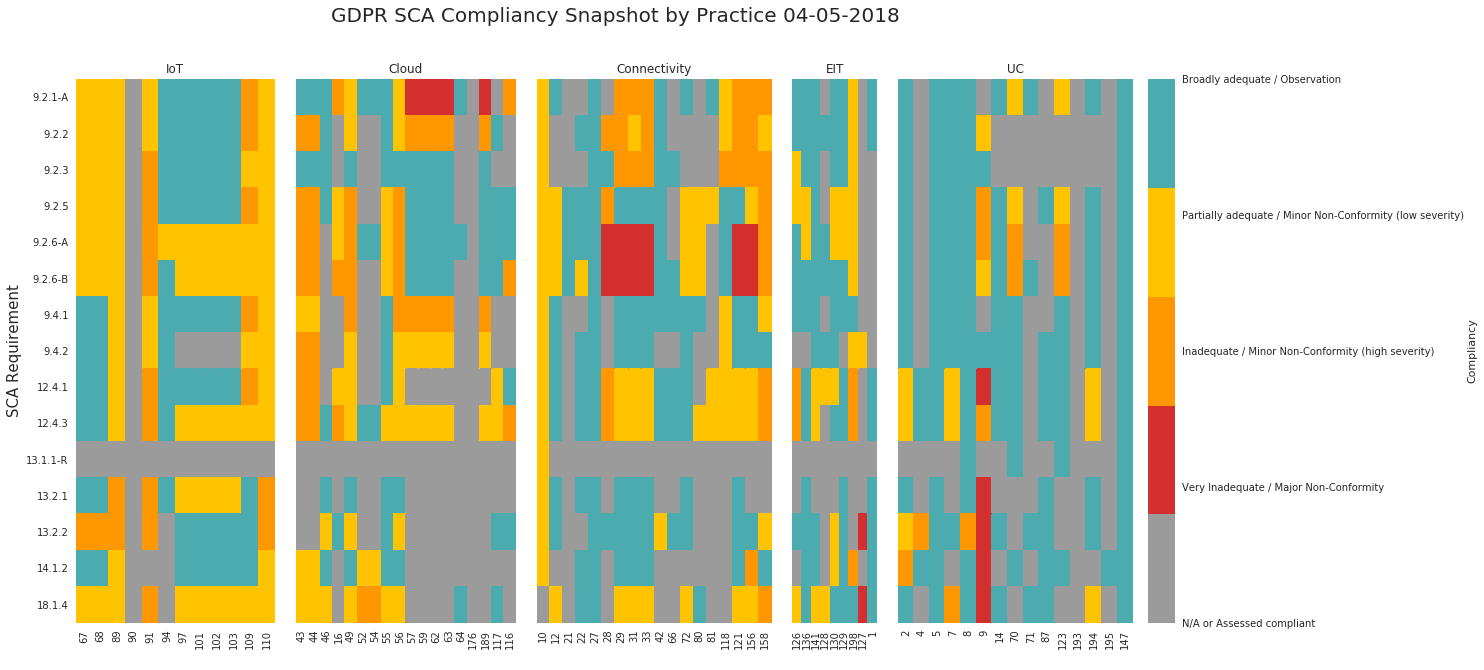

In [363]:
f, (ax, ax1, ax2, ax3, ax4) = plt.subplots(ncols=5, sharex=False, sharey=True, figsize=(20, 10), 
                                           gridspec_kw={"width_ratios":[0.68,0.75,0.8,0.29,1]})
#f.colorbar
f.subplots_adjust(hspace=0.1,wspace=0.1)
#f.subplots_adjust(right=0.5)

#cmap=mcolors.ListedColormap(['#9B9B9B',
#                             '#06C454',
#                             '#2E50FB',
#                             '#FFC300',
#                             '#C70039'])
cmap=mcolors.ListedColormap([GREY,
                             RED,
                             '#FF9800',
                             AMBER,
                             '#4CABAF'])


title = "GDPR SCA Compliancy Snapshot by Practice "+today
f.suptitle(title, size=20)


zx = sns.heatmap(iot_sca_heatmap_df, ax=ax, square=False, cmap=cmap, cbar=False, yticklabels=True, xticklabels=True)

ax.set_title('IoT')
ax.set_ylabel('SCA Requirement', size=15)

zx1 = sns.heatmap(cloud_sca_heatmap_df, ax=ax1, square=False, cmap=cmap, cbar=False, xticklabels=True)
ax1.set_title('Cloud')

zx2 = sns.heatmap(connectivity_sca_heatmap_df, ax=ax2, square=False, cmap=cmap, cbar=False, xticklabels=True)
ax2.set_title('Connectivity')

zx3 = sns.heatmap(eit_sca_heatmap_df, ax=ax3, square=False, cmap=cmap, cbar=False, xticklabels=True)
ax3.set_title('EIT')

zx4 = sns.heatmap(uc_sca_heatmap_df, ax=ax4, square=False, cmap=cmap, xticklabels=True, cbar_kws={"orientation": "vertical","label": "Compliancy"})
ax4.set_title('UC')

cbar = zx4.collections[0].colorbar
cbar.set_ticks([0, 1, 2, 3, 4])
cbar.set_ticklabels(['N/A or Assessed compliant',
                     'Very Inadequate / Major Non-Conformity',
                     'Inadequate / Minor Non-Conformity (high severity)', 
                     'Partially adequate / Minor Non-Conformity (low severity)', 
                     'Broadly adequate / Observation'])

f.savefig(OUTPUT_BASE_DIR+"/SCA-Baseline-Per-Practice-Heatmap-"+today+".png")

In [364]:
#convert back
sca_heatmap_df.replace(to_replace=0, value=SCA_COMPLIANCE_INVERSE.get(0), inplace=True)
sca_heatmap_df.replace(to_replace=1, value=SCA_COMPLIANCE_INVERSE.get(1), inplace=True)
sca_heatmap_df.replace(to_replace=2, value=SCA_COMPLIANCE_INVERSE.get(2), inplace=True)
sca_heatmap_df.replace(to_replace=3, value=SCA_COMPLIANCE_INVERSE.get(3), inplace=True)
sca_heatmap_df.replace(to_replace=4, value=SCA_COMPLIANCE_INVERSE.get(4), inplace=True)
sca_heatmap_df.replace(to_replace=5, value=SCA_COMPLIANCE_INVERSE.get(5), inplace=True)

heatmap_df.replace(to_replace=1, value=PCA_COMPLIANCE_INVERSE.get(1), inplace=True)
heatmap_df.replace(to_replace=2, value=PCA_COMPLIANCE_INVERSE.get(2), inplace=True)
heatmap_df.replace(to_replace=3, value=PCA_COMPLIANCE_INVERSE.get(3), inplace=True)
heatmap_df.replace(to_replace=4, value=PCA_COMPLIANCE_INVERSE.get(4), inplace=True)
heatmap_df.replace(to_replace=5, value=PCA_COMPLIANCE_INVERSE.get(5), inplace=True)

In [365]:
output_writer = pd.ExcelWriter(OUTPUT_BASE_DIR+'/GDPR-SNAPSHOT-Week'+week+'-'+today+'.xlsx')
heatmap_df.to_excel(output_writer, 'PCA Baseline')
pca_baseline.to_excel(output_writer, 'PCA Rollup Baseline')
new_compliancy_stats.to_excel(output_writer, 'PCA Rollup Baseline Stats')
sca_heatmap_df.to_excel(output_writer, 'SCA Baseline')
pca_df.to_excel(output_writer, 'PCA Data Table')
sca_df.to_excel(output_writer, 'SCA Data Table')
sca_compliancy_stats.to_excel(output_writer, 'SCA Baseline Stats')
output_writer.save()

In [366]:
pca_df['Compliance Assessment'].value_counts()

PARTIALLY COMPLIANT      2856
NON-COMPLIANT            1580
PARTIALLY COMPLIANT f     621
PARTIALLY COMPLIANT       329
NON-COMPLIANT f           263
N/A                       129
NON-COMPLIANT              57
FULLY COMPLIANT            14
COMPLIANT                   4
N/a                         3
Name: Compliance Assessment, dtype: int64

# Create HTML Heatmap

In [367]:
dates_dict = OrderedDict(pca_df['Delivery Date'].value_counts(sort=False))
dates_dict.keys().sort()
dates_dict

sorted_dict = OrderedDict(sorted(dates_dict.items(), key=lambda t: t[0]))
sorted_dict

OrderedDict([(Timestamp('2017-04-30 00:00:00'), 1),
             (Timestamp('2018-02-08 00:00:00'), 4),
             (Timestamp('2018-02-28 00:00:00'), 31),
             (Timestamp('2018-03-28 00:00:00'), 2),
             (Timestamp('2018-03-30 00:00:00'), 4),
             (Timestamp('2018-03-31 00:00:00'), 66),
             (Timestamp('2018-04-27 00:00:00'), 54),
             (Timestamp('2018-04-30 00:00:00'), 284),
             (Timestamp('2018-05-01 00:00:00'), 36),
             (Timestamp('2018-05-11 00:00:00'), 465),
             (Timestamp('2018-05-15 00:00:00'), 39),
             (Timestamp('2018-05-18 00:00:00'), 2027),
             (Timestamp('2018-05-25 00:00:00'), 506),
             (Timestamp('2018-05-30 00:00:00'), 2),
             (Timestamp('2018-05-31 00:00:00'), 21),
             (Timestamp('2018-06-04 00:00:00'), 8),
             (Timestamp('2018-06-08 00:00:00'), 4),
             (Timestamp('2018-06-15 00:00:00'), 4),
             (Timestamp('2018-06-29 00:00:00'), 9

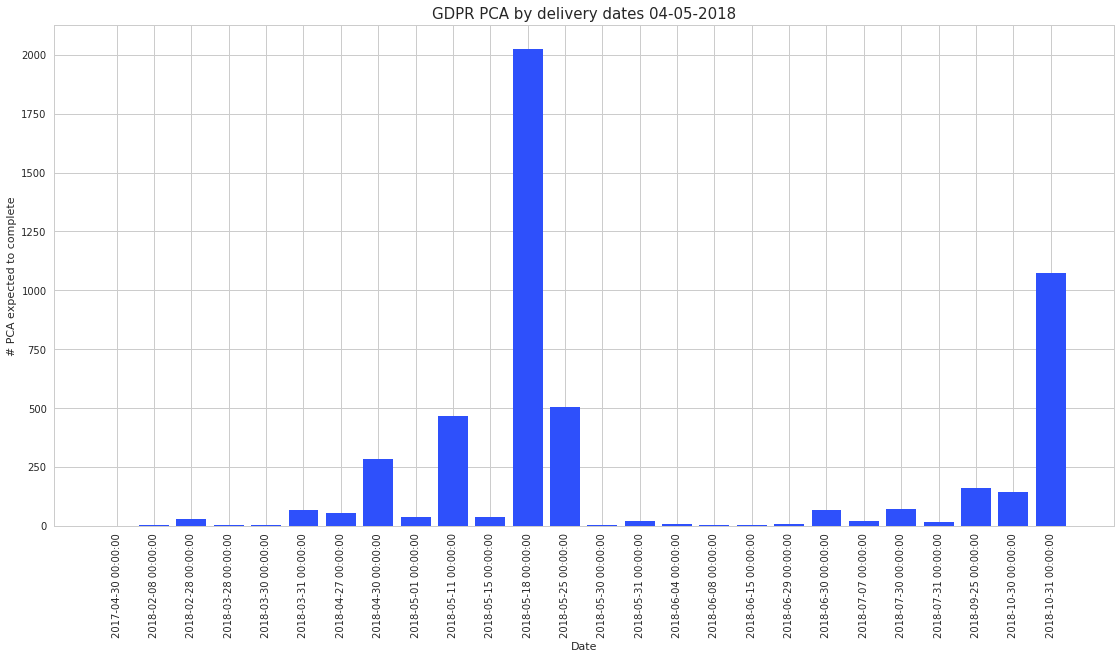

In [368]:
f, ax = plt.subplots(figsize=(19, 12))
f.subplots_adjust(bottom=0.3,hspace=0.5,wspace=0.5)

#OrderedDict(sorted(d.items(), key=lambda t: t[0]))
dates = sorted_dict

bars = list(dates.values())
xticks = list(dates.keys())

#bar1.append(pca_burndown_df[today]['Total'])

#xticks.append(today)

x= np.arange(len(bars))

plt.bar(x, bars, color=BLUE)
plt.xticks(x, xticks, rotation=90)
plt.xlabel("Date")
plt.ylabel("# PCA expected to complete")
plt.title("GDPR PCA by delivery dates "+today, size=15)
f.savefig(OUTPUT_BASE_DIR+"/PCA-Delivery-Dates-"+today+".png")

In [369]:
pca_df.head()

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA
0,NON-COMPLIANT,2018-04-30,1.0,GDPR-RS-EPS176-IoT-Analytics-V4.0 REVIEWED-(02...,176,PRJ03563,EPS176-PCA-2H-A,2H,Remediation in progress,Governance Framework and application of Privac...,EPS176-PCA-2H,PCA,Project Code Allocated,Cloud,A,NaN,NaN,NaN
1,NON-COMPLIANT,2018-05-11,1.0,GDPR-RS-EPS176-IoT-Analytics-V4.0 REVIEWED-(02...,176,PRJ03563,EPS176-PCA-4H-A,4H,Remediation in progress,"Process Module resolution, apply step to Aris,...",EPS176-PCA-4H,PCA,Project Code Allocated,Cloud,B,NaN,NaN,NaN
2,NON-COMPLIANT,2018-05-11,1.0,GDPR-RS-EPS176-IoT-Analytics-V4.0 REVIEWED-(02...,176,PRJ03563,EPS176-PCA-52H-A,52H,Remediation in progress,"Process Module resolution, apply step to Aris,...",EPS176-PCA-52H,PCA,Project Code Allocated,Cloud,F,NaN,NaN,NaN
3,NON-COMPLIANT,2018-05-11,1.0,GDPR-RS-EPS176-IoT-Analytics-V4.0 REVIEWED-(02...,176,PRJ03563,EPS176-PCA-52V-A,52V,Remediation in progress,"Process Module resolution, apply step to Aris,...",EPS176-PCA-52V,PCA,Project Code Allocated,Cloud,F,NaN,NaN,NaN
4,NON-COMPLIANT,2018-05-11,1.0,GDPR-RS-EPS176-IoT-Analytics-V4.0 REVIEWED-(02...,176,PRJ03563,EPS176-PCA-58H-A,58H,Remediation in progress,"Process Module resolution, apply step to Aris,...",EPS176-PCA-58H,PCA,Project Code Allocated,Cloud,F,NaN,NaN,NaN


In [370]:
def return_risk_score( risk_cat ):
    #print int(prod_id)
    if risk_cat == 'A':
        return 1
    elif risk_cat == 'B':
        return 2
    elif risk_cat == 'C':
        return 3
    elif risk_cat == 'D':
        return 4
    elif risk_cat == 'E':
        return 5
    elif risk_cat == 'F':
        return 6
    elif risk_cat == 'G':
        return 7
    elif risk_cat == 'H':
        return 8
    elif risk_cat == 'I':
        return 9
    
pca_df['Risk Score'] = pca_df['Risk Category'].map(lambda x: return_risk_score(x))

In [371]:
pca_df['Comp'] = pca_df['Compliance Assessment'].map(lambda x: PCA_COMPLIANCE.get(x))
pca_df.head(2)

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA,Risk Score,Comp
0,NON-COMPLIANT,2018-04-30,1.0,GDPR-RS-EPS176-IoT-Analytics-V4.0 REVIEWED-(02...,176,PRJ03563,EPS176-PCA-2H-A,2H,Remediation in progress,Governance Framework and application of Privac...,EPS176-PCA-2H,PCA,Project Code Allocated,Cloud,A,NaN,NaN,NaN,1,5
1,NON-COMPLIANT,2018-05-11,1.0,GDPR-RS-EPS176-IoT-Analytics-V4.0 REVIEWED-(02...,176,PRJ03563,EPS176-PCA-4H-A,4H,Remediation in progress,"Process Module resolution, apply step to Aris,...",EPS176-PCA-4H,PCA,Project Code Allocated,Cloud,B,NaN,NaN,NaN,2,5


In [372]:
pca_df.head()

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA,Risk Score,Comp
0,NON-COMPLIANT,2018-04-30,1.0,GDPR-RS-EPS176-IoT-Analytics-V4.0 REVIEWED-(02...,176,PRJ03563,EPS176-PCA-2H-A,2H,Remediation in progress,Governance Framework and application of Privac...,EPS176-PCA-2H,PCA,Project Code Allocated,Cloud,A,NaN,NaN,NaN,1,5
1,NON-COMPLIANT,2018-05-11,1.0,GDPR-RS-EPS176-IoT-Analytics-V4.0 REVIEWED-(02...,176,PRJ03563,EPS176-PCA-4H-A,4H,Remediation in progress,"Process Module resolution, apply step to Aris,...",EPS176-PCA-4H,PCA,Project Code Allocated,Cloud,B,NaN,NaN,NaN,2,5
2,NON-COMPLIANT,2018-05-11,1.0,GDPR-RS-EPS176-IoT-Analytics-V4.0 REVIEWED-(02...,176,PRJ03563,EPS176-PCA-52H-A,52H,Remediation in progress,"Process Module resolution, apply step to Aris,...",EPS176-PCA-52H,PCA,Project Code Allocated,Cloud,F,NaN,NaN,NaN,6,5
3,NON-COMPLIANT,2018-05-11,1.0,GDPR-RS-EPS176-IoT-Analytics-V4.0 REVIEWED-(02...,176,PRJ03563,EPS176-PCA-52V-A,52V,Remediation in progress,"Process Module resolution, apply step to Aris,...",EPS176-PCA-52V,PCA,Project Code Allocated,Cloud,F,NaN,NaN,NaN,6,5
4,NON-COMPLIANT,2018-05-11,1.0,GDPR-RS-EPS176-IoT-Analytics-V4.0 REVIEWED-(02...,176,PRJ03563,EPS176-PCA-58H-A,58H,Remediation in progress,"Process Module resolution, apply step to Aris,...",EPS176-PCA-58H,PCA,Project Code Allocated,Cloud,F,NaN,NaN,NaN,6,5


AttributeError: 'str' object has no attribute 'shape'

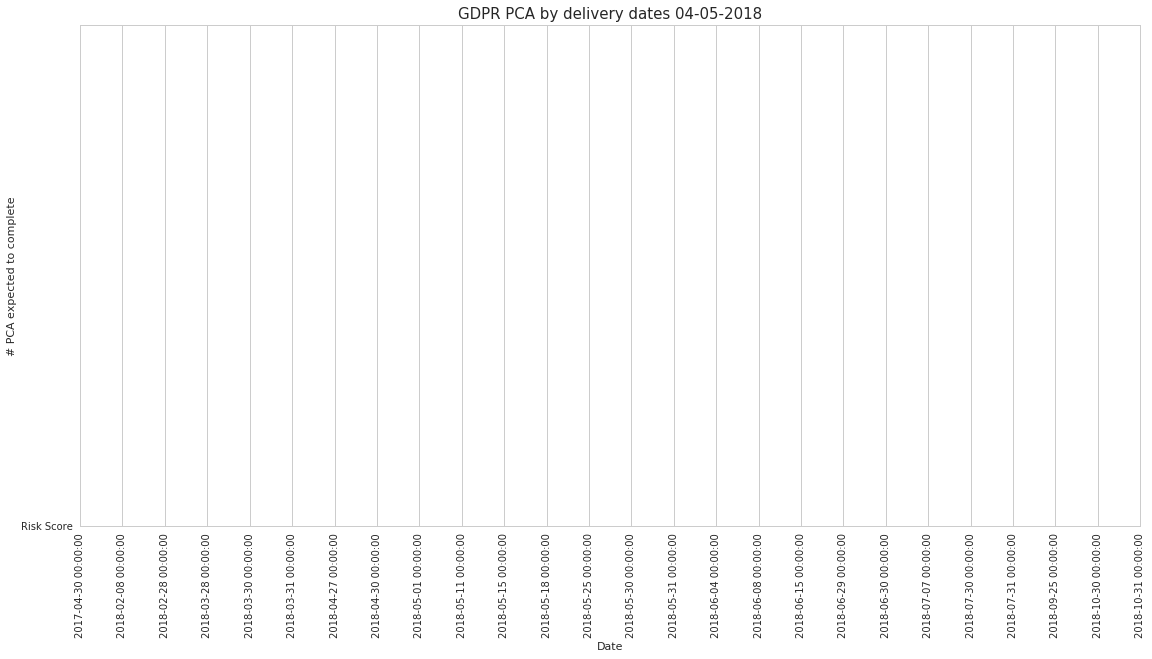

In [373]:
f, ax = plt.subplots(figsize=(19, 12))
f.subplots_adjust(bottom=0.3,hspace=0.5,wspace=0.5)

#OrderedDict(sorted(d.items(), key=lambda t: t[0]))
dates = sorted_dict

bars = list(dates.values())
xticks = list(dates.keys())

#bar1.append(pca_burndown_df[today]['Total'])

#xticks.append(today)

x= np.arange(len(bars))

plt.xticks(x, xticks, rotation=90)
plt.xlabel("Date")
plt.ylabel("# PCA expected to complete")
plt.title("GDPR PCA by delivery dates "+today, size=15)

data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('Delivery Date', 'Risk Score', c='Risk Category', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')

#f.savefig(OUTPUT_BASE_DIR+"/PCA-Delivery-Dates-"+today+".png")data = {'a': np.arange(50),
